#IS 675 Assignment 1: Customer Churn for Telecommunication Service Company
---

## 1. Introduction

This data set contains information of customers that have used our services before.
<br>

We will use this file to predict whether or not the customer will churn (cancel service) and discontinue their relationship with us.
<br>

Our goal is to identify which variables does the company need to focus on, in order to maintain relationships with customer.

<br>
VARIABLE DESCRIPTIONS:<br>
cust_id: A unique customer identifier (e.g., C00124).<br>
region: Region section customer is located (e.g., R2, R3).<br>
tenure: The number of months or years the customer has been with the service provider (e.g., 13, 68).<br>
age: The age of the customer (e.g., 44, 52).<br>
marital: The marital status of the customer (e.g., Y for Yes/Married, N for No/Single).<br>
address: Number of years the customer has lived at their current address (e.g., 9, 24).<br>
income: Annual income of customer in 1000s (e.g., 64, 116).<br>
ed: Education level sectioned for customer (e.g., E4, E1).<br>
employ: Number of years employed (e.g., 5, 29).<br>
retire: Whether the customer is retired (e.g., Y for Yes, N for No).<br>
gender: The gender of the customer (N for male and Y for female, possibly).<br>
reside: Number of years the customer has resided in their current region (e.g., 2, 4).<br>
tollfree: Whether the customer uses toll-free services (e.g., N for No, Y for Yes).<br>
equip: Whether the customer uses specific equipment services (e.g., N for No, Y for Yes).<br>
callcard: Whether the customer uses a calling card (e.g., N for No).<br>
wireless: Whether the customer has a wireless service (e.g., Y for Yes, N for No).<br>
longmon: Long-distance service usage per month in dollars (e.g., 3.7, 18.15).<br>
tollmon: Toll service usage per month in dolalrs (e.g., 0, 18).<br>
equipmon: Equipment rental charges per month in dollars (e.g., 0, 42.5).<br>
cardmon: Calling card usage per month in dollars (e.g., 0, 7.5).<br>
wiremon: Wireless service usage per month in dollars (e.g., 7.5, 30.25).<br>
longten: Long-distance service usage over the past ten months in dollars (e.g., 37.45, 1300.6).<br>
tollten: Toll service usage over the past ten months in dolalrs (e.g., 0, 1247.2).<br>
equipten: Equipment rental charges over the past ten months in dollars (e.g., 0, 179.1).<br>
cardten: Calling card usage over the past ten months (e.g., 0, 110).<br>
wireten: Wireless service usage over the past ten months (e.g., 110, 2150).<br>
multline: Whether the customer has multiple lines (e.g., N for No, Y for Yes).<br>
voice: Whether the customer has a voice service (e.g., N for No, Y for Yes).<br>
pager: Whether the customer has a pager (e.g., N for No, Y for Yes).<br>
internet: Whether the customer has internet service (e.g., N for No, Y for Yes).<br>
callid: Whether the customer has caller ID service (e.g., Y for Yes, N for No).<br>
callwait: Whether the customer has call waiting service (e.g., Y for Yes, N for No).<br>
forward: Whether the customer has call forwarding service (e.g., N for No, Y for Yes).<br>
confer: Whether the customer has conference calling service (e.g., N for No, Y for Yes).<br>
ebill: Whether the customer uses electronic billing (e.g., Y for Yes, N for No).<br>
loglong: Log of long-distance calls (e.g., 1.308, 2.899).<br>
lninc: Line usage indicator (e.g., 4.159, 4.754).<br>
custcat: A categorical customer type (e.g., C1, C2, C3).<br>
churn: Indicates whether the customer has churned (left the service provider) or not (e.g., Y for Yes, N for No).<br>
<br>
Target variable: **churn**

### 1.0 Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.1 Libraries Used

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

### 1.2 Data Understanding Literature

Article: https://www.lightico.com/blog/complete-guide-to-reduce-churn-in-telecom/#:~:text=In%20terms%20of%20telecoms%2C%20the,to%20your%20service%20is%20low.

Discusses reasons why customers would churn. Article discusses that customer service is essential. So when we look at our variables we need to understand which services customers are using and if our rates are fair. Because it would be better to have a loyal customer than a quick buck. Also looking at patterns within the data is key to identifying early on if a customer will churn.

Article: https://medium.com/@KingHenryMorgansDiary/comprehensive-report-telecom-customer-churn-analysis-and-recommendations-398eedaf3466

An example dataset with its breakdown of variables. Such as demographic, service usage, and payment types. Most of these share similarity to what we have.

### 1.3 Data Understanding

Goal is to understand what dataset that I am working with, so I would like to see what fields I am working with and the datatypes associated.

*   df.head() for a quick glance of the data showing the fields and record entries
*   df.isnull.sum() to identify if any null values exist in our dataset
*   df.shape() to identify how many records and fields
*   df.dtypes() to see what are the datatypes






In [ ]:
# Read data (with assignment operator)
df = pd.read_csv('/content/drive/MyDrive/IS675_data/CutomerChurnData.csv')
# pokemon is a dataframe
df.head()

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N


From glancing through record entries I see the following behavior of values

*   category grouping
*   numerical
*   boolean
*   currency
*   usage




In [ ]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Display the number of null values per column
print(null_values)

cust_id     0
region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
employ      0
retire      0
gender      0
reside      0
tollfree    0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
equipten    0
cardten     0
wireten     0
multline    0
voice       0
pager       0
internet    0
callid      0
callwait    0
forward     0
confer      0
ebill       0
loglong     0
lninc       0
custcat     0
churn       0
dtype: int64


No null values detected, I don't need to add average values or drop records.

In [ ]:
# Examine the number of rows and cols
df.shape

(1000, 39)

We have 39 columns, which is alot of variables to work with. I need to identify what attributes I can work with.

We have 1000 records, lucky this amount is not alot but not too little. Calculations would be easier with divisilblity of 10.


In [ ]:
# Check the data types
df.dtypes

,0
cust_id,object
region,object
tenure,int64
age,int64
marital,object
address,int64
income,int64
ed,object
employ,int64
retire,object


Idenfity that data is broken down into three main types.
*   object
*   int64
*   float64

Would like to split analysis based off datatype independentally

#### 1.31 Object Datatype




In [ ]:
# Looking at object types to understand.
df_objects = df.select_dtypes(include=['object'])
df_objects = df_objects.drop(columns=['churn'])
print(df_objects)

    cust_id region marital  ed retire gender tollfree equip callcard wireless  \
0    C00124     R2       Y  E4      N      N        N     N        Y        N   
1    C00125     R3       Y  E1      N      Y        Y     N        Y        N   
2    C00126     R2       Y  E1      N      N        N     N        N        N   
3    C00127     R3       Y  E2      N      Y        N     N        Y        N   
4    C00128     R3       Y  E4      N      N        Y     N        Y        N   
..      ...    ...     ...  ..    ...    ...      ...   ...      ...      ...   
995  C01119     R1       N  E3      N      N        Y     N        Y        N   
996  C01120     R1       Y  E2      N      N        Y     N        Y        N   
997  C01121     R1       Y  E5      N      N        Y     Y        N        Y   
998  C01122     R1       N  E5      N      Y        N     Y        N        N   
999  C01123     R3       N  E2      N      Y        Y     N        Y        N   

    multline voice pager in

When analyzing object datatype fields we see the data broken down to mainly two ways.

*   Categorical, with fields such as region, ed, and custcat. These fields have records broken down into sections such as E1, E2, E3, E4.
*   Boolean with fields such as retire, equip, multiline and so on. What catches my attention is that these fields seems to broken down to personal customer data or services the customer has.

We see fields that would suggest a telecommunication service company. As attributes such as voice, pager, internet, callid, wireless, tollfree and so on. They seem closely related.


#### 1.32 Int64 Datatype

In [ ]:
# Looking at int64 types to understand.
df_int64 = df.select_dtypes(include=['int64'])
print(df_int64)

     tenure  age  address  income  employ  reside  cardten
0        13   44        9      64       5       2      110
1        68   52       24     116      29       2     2150
2        23   30        9      30       2       4        0
3        45   22        2      19       4       5      415
4        45   59        7     166      31       5      505
..      ...  ...      ...     ...     ...     ...      ...
995      50   43        6      27       4       1     2645
996      34   52        2     106      19       2      430
997      15   46       17      63       1       2        0
998       7   34        2      22       5       1        0
999      70   49       18      87      22       1     1705

[1000 rows x 7 columns]


When analyzing int64 datatypes fields we see that fields are broken down into various characteristics

*   tenure, employ, address, reside represents how long of something. Such as tenure could be how long they are in service, address could be how long they've owned that address.
*   Age and income represents numerical value as age is probably year of age. While income could be annual salary in thousands.







#### 1.33 Float64 Datatype

In [ ]:
# Looking at float64 types to understand.
df_float64 = df.select_dtypes(include=['float64'])
print(df_float64)

     longmon  tollmon  equipmon  cardmon  wiremon  longten  tollten  equipten  \
0       3.70     0.00       0.0     7.50      0.0    37.45     0.00      0.00   
1      18.15    18.00       0.0    30.25      0.0  1300.60  1247.20      0.00   
2       6.30     0.00       0.0     0.00      0.0   157.05     0.00      0.00   
3      10.90     0.00       0.0     8.75      0.0   504.50     0.00      0.00   
4       9.75    28.50       0.0    12.00      0.0   449.05  1240.15      0.00   
..       ...      ...       ...      ...      ...      ...      ...       ...   
995    15.00    45.25       0.0    52.75      0.0   817.85  2320.25      0.00   
996     4.95    19.00       0.0    13.50      0.0   153.50   649.35      0.00   
997     3.70    16.50      42.5     0.00     33.1    40.55   207.35    547.95   
998     4.65     0.00      25.6     0.00      0.0    29.35     0.00    179.10   
999    25.60    33.50       0.0    25.25      0.0  1841.85  2368.20      0.00   

     wireten  loglong  lnin

When analyzing float64 datatype fields, we see that fields into dollar usage.

*   Supports our guess earlier that we are in a service industry that is charging customers.
*   Some fields here share a common name with our boolean types such as equip/equipmon, card/callcard, wiremon/wireless and so on.
*   With common field phrase 'mon' could be that those are monthly charges.
*   While loglong and lninc i'm unsure what these are so would need further analysis.

We see money associated records for the most part of float64 datatypes.





### 1.4 Charts

Would like to run some basic charts using seaborn to see how field of interest acts.

#### 1.41 Object Charts

In [ ]:
df_objects.head()

,cust_id,region,marital,ed,retire,gender,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat
0,C00124,R2,Y,E4,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,C1
1,C00125,R3,Y,E1,N,Y,Y,N,Y,N,N,N,N,N,Y,Y,N,Y,N,C3
2,C00126,R2,Y,E1,N,N,N,N,N,N,N,N,N,N,Y,N,Y,Y,N,C3
3,C00127,R3,Y,E2,N,Y,N,N,Y,N,Y,N,N,Y,N,Y,N,N,Y,C2
4,C00128,R3,Y,E4,N,N,Y,N,Y,N,Y,N,N,N,Y,Y,Y,Y,N,C3


##### 1.411 Churn Distribution and Countplot Chart

churn
N    742
Y    258
Name: count, dtype: int64


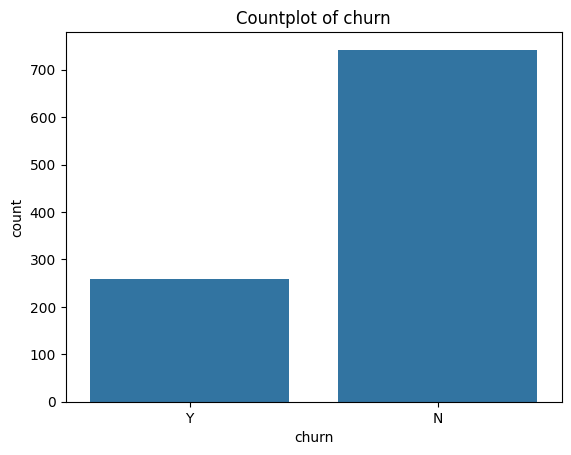

In [ ]:
# Plot a categorical variable: churn
snsplot = sns.countplot(x='churn', data=df)
snsplot.set_title("Countplot of churn")

# Get the count of each unique value in the 'churn' column
churn_summary = df['churn'].value_counts()

# Display the summary
print(churn_summary)


Analyze our target variable churn (cancel relationship), distribution is the following.
*   Y 258
*   N 742

We see that data is **not balanced** because target variable out comes are too far apart, roughly 50% gap. Will need to use undersampling method later.




##### 1.412 Object Countplot Charts

Curious about the distribution of certain fields. Variables selected are simple to understand as it identifies if they have a service or not. Will be utilizing countplots to view distributions of the following.
*   equip, whether or not the customer are renting equipment from us
*   wireless, whether or not the customer have wireless service with us
*   internet, whether or not the customer have internet service with us

equip
N    630
Y    370
Name: count, dtype: int64
 


Text(0.5, 1.0, 'Countplot of customers w/ equipment')

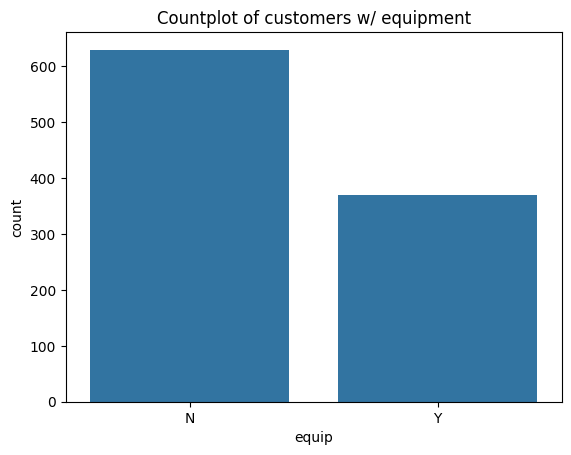

In [ ]:
equip_summary = df_objects['equip'].value_counts()
print(equip_summary)
print(" ")
# Plot a categorical variable: equip
snsplot = sns.countplot(x='equip', data=df)
snsplot.set_title("Countplot of customers w/ equipment")


wireless
N    718
Y    282
Name: count, dtype: int64
 


Text(0.5, 1.0, 'Countplot of customers w/ wireless service')

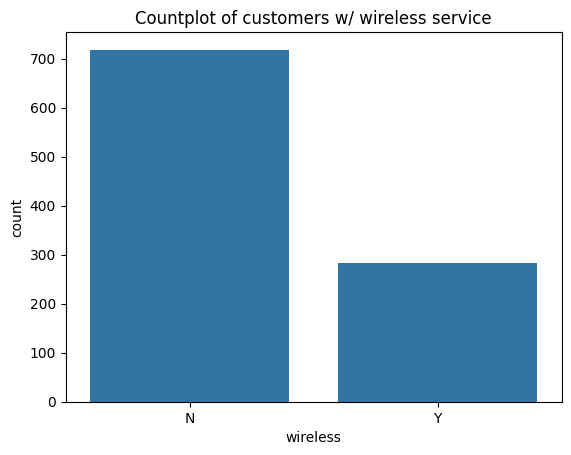

In [ ]:
wireless_summary = df_objects['wireless'].value_counts()
print(wireless_summary)
print(" ")

# Plot a categorical variable: wireless
snsplot = sns.countplot(x='wireless', data=df)
snsplot.set_title("Countplot of customers w/ wireless service")

internet
N    660
Y    340
Name: count, dtype: int64
 


Text(0.5, 1.0, 'Countplot of customers w/ internet service')

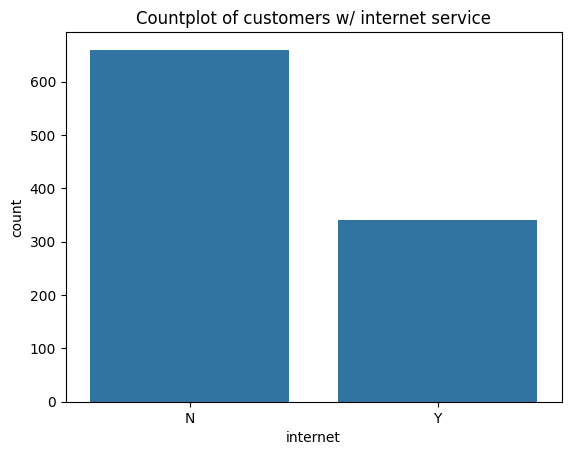

In [ ]:
internet_summary = df_objects['internet'].value_counts()
print(internet_summary)
print(" ")

# Plot a categorical variable: internet
snsplot = sns.countplot(x='internet', data=df)
snsplot.set_title("Countplot of customers w/ internet service")

Distribution of service active seems roughly the same.
*   Approximately 60-70% of 0 or no service
*   Approximately 30-40% of 1 or with service

What this tells me is that most of the customers have had a service but not all of them.



#### 1.42 Int64 Charts

In [ ]:
df_int64.head()

,tenure,age,address,income,employ,reside,cardten
0,13,44,9,64,5,2,110
1,68,52,24,116,29,2,2150
2,23,30,9,30,2,4,0
3,45,22,2,19,4,5,415
4,45,59,7,166,31,5,505


##### 1.421 Int64 Charts

Curious about the distribution of certain fields. Will be utilizing histograms and boxplots to view distributions of the following.
*   age, want to see what our customer age groups are
*   income, want to see our customers income salary
*   employ, want to see how long our customers employment status and years



In [ ]:
df_int64['churn'] = df['churn']
df_int64['churn'] = df_int64['churn'].replace({1: 'Y', 0: 'N'})

df_int64.head()

,tenure,age,address,income,employ,reside,cardten,churn
0,13,44,9,64,5,2,110,Y
1,68,52,24,116,29,2,2150,N
2,23,30,9,30,2,4,0,N
3,45,22,2,19,4,5,415,Y
4,45,59,7,166,31,5,505,N


In [ ]:
# Show the statistics of age
df_int64['age'].describe()

,age
count,1000.000000
mean,41.552000
std,12.679435
min,18.000000
25%,32.000000
50%,40.000000
75%,51.000000
max,77.000000


Text(0.5, 1.0, 'Histogram of age')

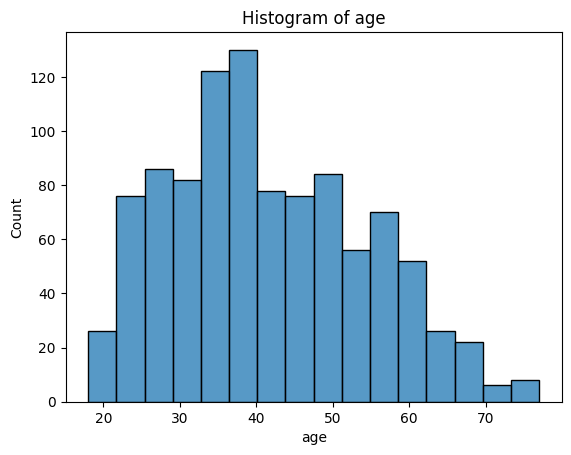

In [ ]:
# Histogram of Age
snsplot = sns.histplot(x='age', data = df_int64)
snsplot.set_title("Histogram of age")

Text(0.5, 1.0, 'Boxplot of Age based on Churn')

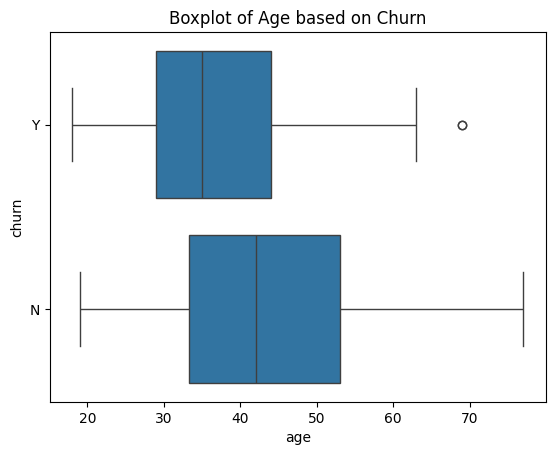

In [ ]:
# Examine relationships between numeric and categorical variables: boxplot age based on churn
snsplot = sns.boxplot(x='age', y= 'churn', data = df_int64)
snsplot.set_title("Boxplot of Age based on Churn")

In [ ]:
# Show the statistics of income
df_int64['income'].describe()

,income
count,1000.000000
mean,71.906000
std,80.297826
min,9.000000
25%,28.000000
50%,46.000000
75%,83.250000
max,732.000000


Text(0.5, 1.0, 'Histogram of income')

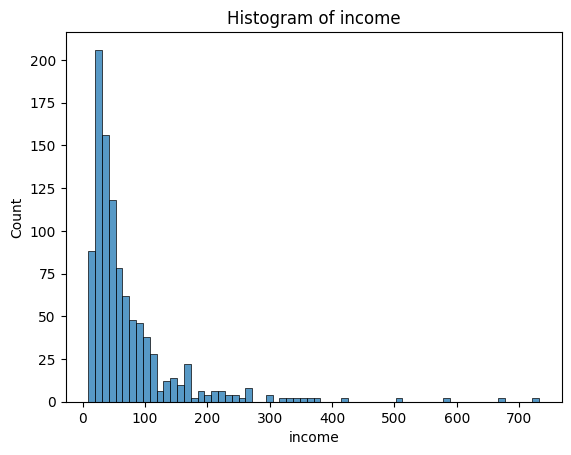

In [ ]:
# Histogram of Income
snsplot = sns.histplot(x='income', data = df_int64)
snsplot.set_title("Histogram of income")

Text(0.5, 1.0, 'Boxplot of Income based on Churn')

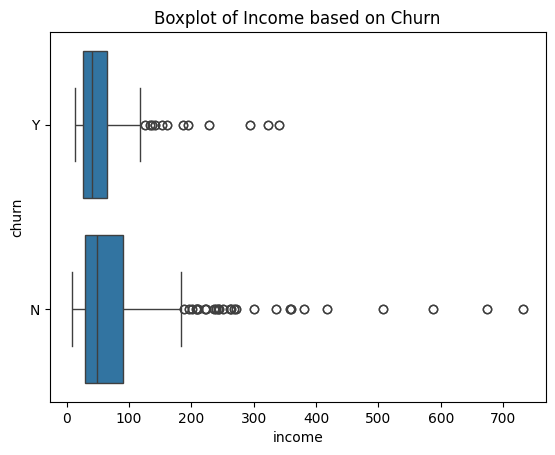

In [ ]:
# Examine relationships between numeric and categorical variables: boxplot income based on churn
snsplot = sns.boxplot(x='income', y= 'churn', data = df_int64)
snsplot.set_title("Boxplot of Income based on Churn")

In [ ]:
# Show the statistics of employ
df_int64['employ'].describe()

,employ
count,1000.00000
mean,10.79000
std,10.14499
min,0.00000
25%,3.00000
50%,8.00000
75%,17.25000
max,47.00000


Text(0.5, 1.0, 'Histogram of employ')

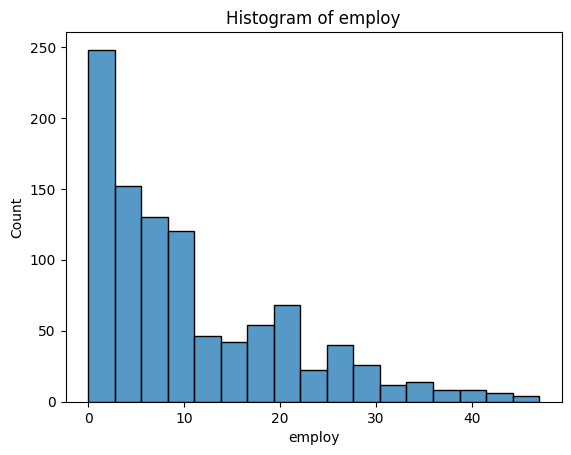

In [ ]:
# Histogram of Employ
snsplot = sns.histplot(x='employ', data = df_int64)
snsplot.set_title("Histogram of employ")

Text(0.5, 1.0, 'Boxplot of Employ based on Churn')

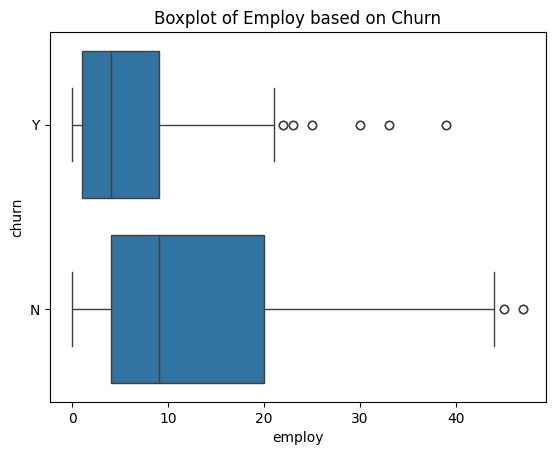

In [ ]:
# Examine relationships between numeric and categorical variables: boxplot employ based on churn
snsplot = sns.boxplot(x='employ', y= 'churn', data = df_int64)
snsplot.set_title("Boxplot of Employ based on Churn")

Our analysis from the charts provides the following.

*   age attribute, we have a wide range of customers but see a normal distribution with a high concentration of late 30 to 40 of age. On our boxplot we see that younger people around 35 tend to churn versus older with an average of 42.
*   income attribute, majority of our customers makes less than 100k a year, seems that we provide service to more of the low income status. Boxplot shows that people with lower income tend to churn but not a big difference compared to those that don't.
*   employe attribute, employment history for most customers are up to 10 years in and are either stating their careers or unemployed. Boxplot shows that those who recently join the workforce tend to churn while those with longer years of employment does not.


#### 1.43 Float64 Charts

In [ ]:
df_float64.head()

,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,wireten,loglong,lninc
0,3.70,0.0,0.0,7.50,0.0,37.45,0.00,0.0,0.0,1.308,4.159
1,18.15,18.0,0.0,30.25,0.0,1300.60,1247.20,0.0,0.0,2.899,4.754
2,6.30,0.0,0.0,0.00,0.0,157.05,0.00,0.0,0.0,1.841,3.401
3,10.90,0.0,0.0,8.75,0.0,504.50,0.00,0.0,0.0,2.389,2.944
4,9.75,28.5,0.0,12.00,0.0,449.05,1240.15,0.0,0.0,2.277,5.112


##### 1.431 Float64 Charts

Curious about the distribution of certain fields. Will be utilizing histograms to view distributions of the following variables.
*   equipmon, want to see how monthly equipment charges affect churn
*   wiremon, want to see how monthly wireless bill affect churn
*   loglong, want to see how log of long distance calls affect churn

In [ ]:
df_float64.head()

,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,wireten,loglong,lninc
0,3.70,0.0,0.0,7.50,0.0,37.45,0.00,0.0,0.0,1.308,4.159
1,18.15,18.0,0.0,30.25,0.0,1300.60,1247.20,0.0,0.0,2.899,4.754
2,6.30,0.0,0.0,0.00,0.0,157.05,0.00,0.0,0.0,1.841,3.401
3,10.90,0.0,0.0,8.75,0.0,504.50,0.00,0.0,0.0,2.389,2.944
4,9.75,28.5,0.0,12.00,0.0,449.05,1240.15,0.0,0.0,2.277,5.112


Text(0.5, 1.0, 'Histogram of equipmon in the Customer Churn data set')

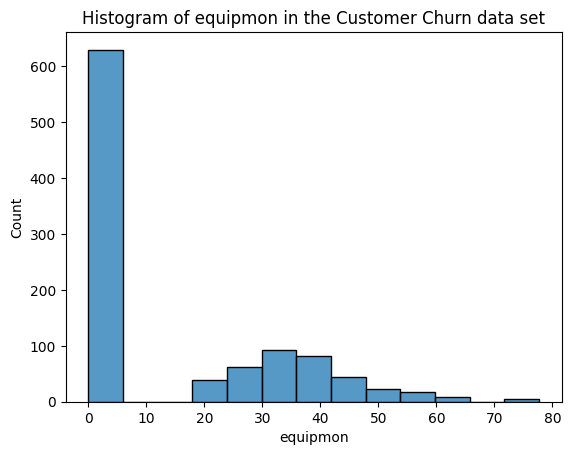

In [ ]:
snsplot = sns.histplot(x='equipmon', data = df_float64)
snsplot.set_title("Histogram of equipmon in the Customer Churn data set")

Text(0.5, 1.0, 'Histogram of wiremon in the Customer Churn data set')

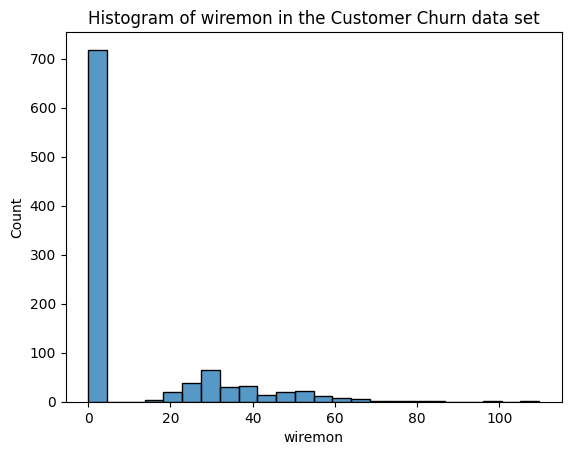

In [ ]:
snsplot = sns.histplot(x='wiremon', data = df_float64)
snsplot.set_title("Histogram of wiremon in the Customer Churn data set")

In [ ]:
# Show the statistics of loglong
df_float64['loglong'].describe()

,loglong
count,1000.000000
mean,2.149468
std,0.716255
min,0.049000
25%,1.639000
50%,2.140000
75%,2.629000
max,4.605000


Text(0.5, 1.0, 'Histogram of loglong in the Customer Churn data set')

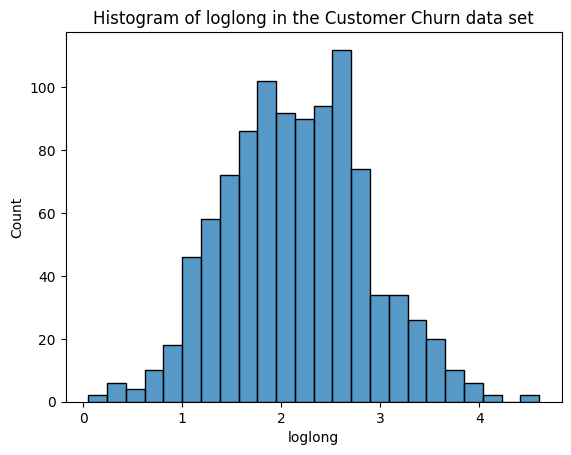

In [ ]:
snsplot = sns.histplot(x='loglong', data = df_float64)
snsplot.set_title("Histogram of loglong in the Customer Churn data set")

Our analysis from the charts provides the following.

*   equipmon attribute, majority of customers don't rent equipment from us. But those that do pay roughly on average 35 monthly.
*   wiremon attribute, majority of customers don't use our wireless service. But those that do pay roughly on average 30 monthly.
*   loglong attribute, majority of our customers log over 2 hours of longdistance calls.

## 2. Data Preprocessing

### 2.1 Dropping Variables

I want to prepare a correlation matrix to test relationships between variables.

*   Convert boolean variables with dummy variables
*   Drop columns that are categorical, since they are section based








In [ ]:
df.head()

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N


Decided to drop the following columns from further analysis
*   cust_id, unique identifier doesn't represent any value
*   region, section of customer do not have a good way to dummy code this
*   ed, similar to region. It shares the section grouping and can't dummy code
*   custcat, similar to region and ed





In [ ]:
columns_to_drop = ['cust_id', 'region', 'ed', 'custcat']

df = df.drop(columns=columns_to_drop)

### 2.2 Dummy Variables

Convert boolean variables into dummy variables with Y equates to 1 and N equates to 0.

In [ ]:
# List of columns to convert
columns_to_convert = ['marital', 'retire', 'gender', 'tollfree', 'equip', 'callcard',
                      'wireless', 'multline', 'voice', 'pager', 'internet',
                      'callid', 'callwait', 'forward', 'confer', 'ebill', 'churn']

# Convert 'Y' to 1 and 'N' to 0 for the specified columns
df[columns_to_convert] = df[columns_to_convert].replace({'Y': 1, 'N': 0})

# Display the updated DataFrame
print(df)


     tenure  age  marital  address  income  employ  retire  gender  reside  \
0        13   44        1        9      64       5       0       0       2   
1        68   52        1       24     116      29       0       1       2   
2        23   30        1        9      30       2       0       0       4   
3        45   22        1        2      19       4       0       1       5   
4        45   59        1        7     166      31       0       0       5   
..      ...  ...      ...      ...     ...     ...     ...     ...     ...   
995      50   43        0        6      27       4       0       0       1   
996      34   52        1        2     106      19       0       0       2   
997      15   46        1       17      63       1       0       0       2   
998       7   34        0        2      22       5       0       1       1   
999      70   49        0       18      87      22       0       1       1   

     tollfree  ...  pager  internet  callid  callwait  forward 

### 2.3 Heatmap Analysis

#### 2.31 Heatmap w/ All Variables

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

            tenure       age   marital   address    income    employ  \
tenure    1.000000  0.475715  0.171770  0.531723  0.260311  0.520837   
age       0.475715  1.000000  0.017643  0.648858  0.375201  0.667698   
marital   0.171770  0.017643  1.000000 -0.005985 -0.012576  0.011014   
address   0.531723  0.648858 -0.005985  1.000000  0.269532  0.473235   
income    0.260311  0.375201 -0.012576  0.269532  1.000000  0.611087   
employ    0.520837  0.667698  0.011014  0.473235  0.611087  1.000000   
retire    0.173175  0.417136 -0.103698  0.286694 -0.077206  0.289078   
gender    0.071648  0.012767  0.075971  0.006487  0.013437  0.064581   
reside    0.003392 -0.219699  0.639853 -0.174909 -0.099252 -0.104103   
tollfree  0.056256  0.076732  0.056539  0.063715  0.129596  0.155891   
equip    -0.156038 -0.126211 -0.026844 -0.112305 -0.063053 -0.198607   
callcard  0.463008  0.295374  0.087291  0.255487  0.178005  0.325973   
wireless  0.010415 -0.012567  0.079438 -0.027744  0.076051 -0.02

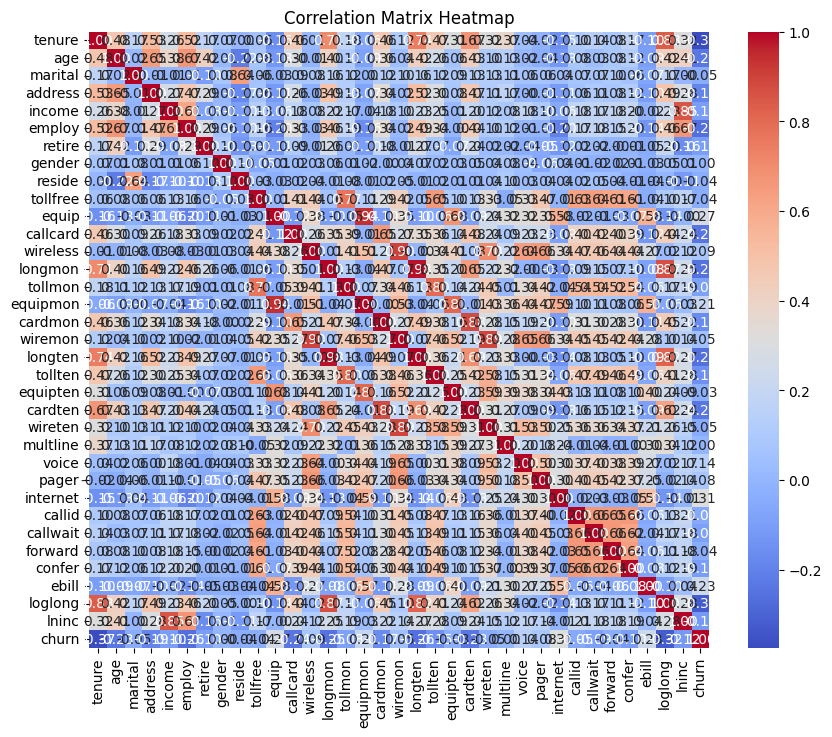

In [ ]:

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the heatmap
plt.title("Correlation Matrix Heatmap")
plt.show()

Results are messy, I need to select a few key attributes to analyze instead. Will use the fields we did charts prior.

#### 2.32 Heatmap w/ Variables of Interest Iteration 1

From previous data explorations I would like to test some variables that I can understand easily and see how it impacts churn.

In [ ]:
columns_to_select = ['equip', 'wireless', 'internet', 'age', 'income', 'employ', 'churn']

df_analyze = df[columns_to_select]

print(df_analyze)

     equip  wireless  internet  age  income  employ  churn
0        0         0         0   44      64       5      1
1        0         0         0   52     116      29      0
2        0         0         0   30      30       2      0
3        0         0         1   22      19       4      1
4        0         0         0   59     166      31      0
..     ...       ...       ...  ...     ...     ...    ...
995      0         0         0   43      27       4      0
996      0         0         1   52     106      19      0
997      1         1         1   46      63       1      1
998      1         0         0   34      22       5      0
999      0         0         0   49      87      22      0

[1000 rows x 7 columns]


In [ ]:
# Compute the correlation matrix
correlation_matrix = df_analyze.corr()

# Display the correlation matrix
print(correlation_matrix)

             equip  wireless  internet       age    income    employ     churn
equip     1.000000  0.375882  0.578028 -0.126211 -0.063053 -0.198607  0.267653
wireless  0.375882  1.000000  0.338343 -0.012567  0.076051 -0.029978  0.087587
internet  0.578028  0.338343  1.000000 -0.125210 -0.055553 -0.200817  0.310136
age      -0.126211 -0.012567 -0.125210  1.000000  0.375201  0.667698 -0.229835
income   -0.063053  0.076051 -0.055553  0.375201  1.000000  0.611087 -0.103138
employ   -0.198607 -0.029978 -0.200817  0.667698  0.611087  1.000000 -0.263677
churn     0.267653  0.087587  0.310136 -0.229835 -0.103138 -0.263677  1.000000


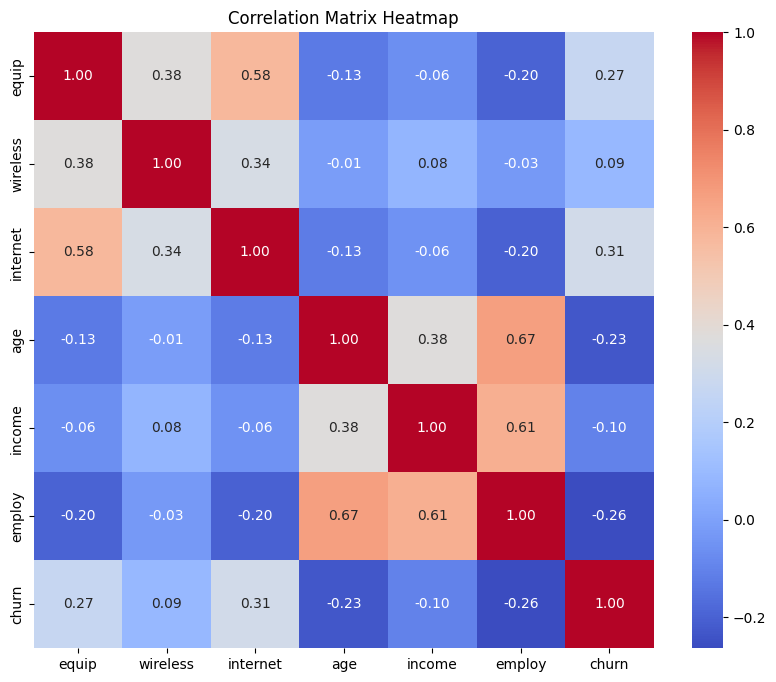

In [ ]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the heatmap
plt.title("Correlation Matrix Heatmap")
plt.show()

From looking at the heatmap we see correlation between age and employ, income and employ, internet and equipment. We see a few correlates with churn such as equip, internet, age, and employ.

What this tells me is that not all of the variables I pick are as impactful on churn. So I would like to see how each variable type reacts to churn.

Thus will be checking object, int64, and float64 datatypes for impact.

#### 2.33 Heatmap w/ Object Data Type

In [ ]:
df_objects.head()

,cust_id,region,marital,ed,retire,gender,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat
0,C00124,R2,Y,E4,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,C1
1,C00125,R3,Y,E1,N,Y,Y,N,Y,N,N,N,N,N,Y,Y,N,Y,N,C3
2,C00126,R2,Y,E1,N,N,N,N,N,N,N,N,N,N,Y,N,Y,Y,N,C3
3,C00127,R3,Y,E2,N,Y,N,N,Y,N,Y,N,N,Y,N,Y,N,N,Y,C2
4,C00128,R3,Y,E4,N,N,Y,N,Y,N,Y,N,N,N,Y,Y,Y,Y,N,C3


In [ ]:
columns_to_select = ['marital', 'retire', 'gender', 'tollfree', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'churn']
df_analyze = df[columns_to_select]

print(df_analyze)

     marital  retire  gender  tollfree  callcard  wireless  multline  voice  \
0          1       0       0         0         1         0         0      0   
1          1       0       1         1         1         0         0      0   
2          1       0       0         0         0         0         0      0   
3          1       0       1         0         1         0         1      0   
4          1       0       0         1         1         0         1      0   
..       ...     ...     ...       ...       ...       ...       ...    ...   
995        0       0       0         1         1         0         0      0   
996        1       0       0         1         1         0         0      0   
997        1       0       0         1         0         1         1      1   
998        0       0       1         0         0         0         0      0   
999        0       0       1         1         1         0         0      1   

     pager  internet  callid  callwait  forward  co

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_analyze.corr()

# Display the correlation matrix
print(correlation_matrix)

           marital    retire    gender  tollfree  callcard  wireless  \
marital   1.000000 -0.103698  0.075971  0.056539  0.087291  0.079438   
retire   -0.103698  1.000000  0.101246  0.011449  0.094120 -0.014516   
gender    0.075971  0.101246  1.000000 -0.051858  0.024253  0.028606   
tollfree  0.056539  0.011449 -0.051858  1.000000  0.406605  0.440255   
callcard  0.087291  0.094120  0.024253  0.406605  1.000000  0.261195   
wireless  0.079438 -0.014516  0.028606  0.440255  0.261195  1.000000   
multline  0.113147  0.018033  0.084681 -0.045174  0.091643  0.220459   
voice     0.056152 -0.042927  0.041219  0.334762  0.231015  0.635455   
pager     0.063080 -0.053588 -0.061250  0.473504  0.231738  0.658803   
internet  0.044924 -0.124963  0.039349 -0.010487 -0.087512  0.338343   
callid    0.067971  0.019596  0.007984  0.629216  0.403471  0.473081   
callwait  0.067971  0.019596 -0.024016  0.637229  0.420708  0.464191   
forward   0.103841 -0.004900 -0.020102  0.610478  0.399877  0.44

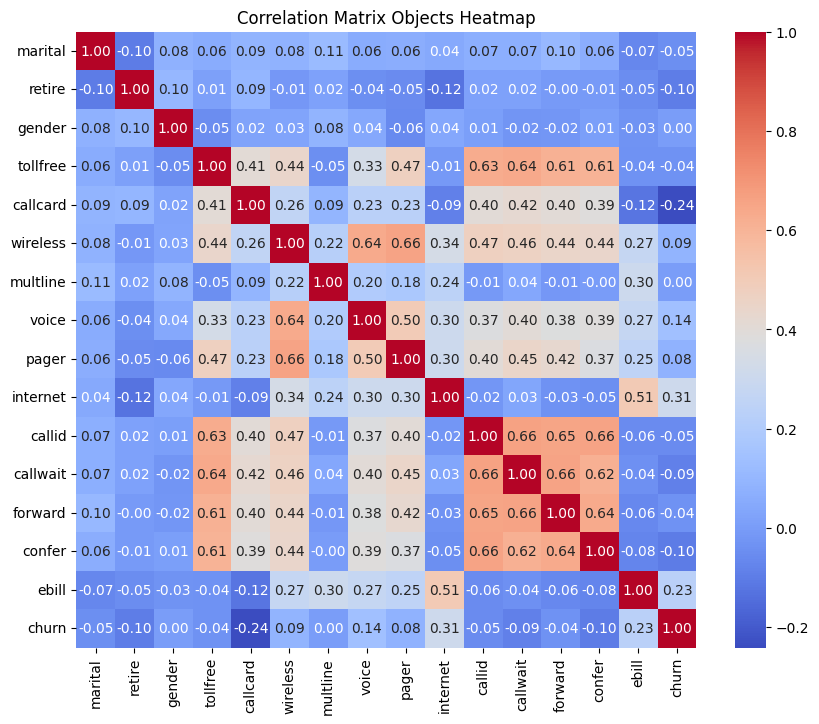

In [ ]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the heatmap
plt.title("Correlation Matrix Objects Heatmap")
plt.show()

From the heatmap we see that callcard, internet, and ebill correlates with churn.
*   callcard/churn -0.24, interprets a moderate negative relationship. If a customer has a callcard they are moderate less likely to churn.
*   internet/churn 0.31, interprets a positive relationship, if a customer has internet service they are likely to churn.
*   ebill/ churn 0.23, interprets a moderate positive relationship. If a customer has ebill service they are likely to churn.



#### 2.34 Heatmap w/ Int64 Data Type

In [ ]:
df_int64.head()

,tenure,age,address,income,employ,reside,cardten,churn
0,13,44,9,64,5,2,110,Y
1,68,52,24,116,29,2,2150,N
2,23,30,9,30,2,4,0,N
3,45,22,2,19,4,5,415,Y
4,45,59,7,166,31,5,505,N


In [ ]:
columns_to_select = ['tenure', 'age', 'address', 'income', 'employ', 'reside', 'cardten', 'churn']
df_analyze = df[columns_to_select]

print(df_analyze)

     tenure  age  address  income  employ  reside  cardten  churn
0        13   44        9      64       5       2      110      1
1        68   52       24     116      29       2     2150      0
2        23   30        9      30       2       4        0      0
3        45   22        2      19       4       5      415      1
4        45   59        7     166      31       5      505      0
..      ...  ...      ...     ...     ...     ...      ...    ...
995      50   43        6      27       4       1     2645      0
996      34   52        2     106      19       2      430      0
997      15   46       17      63       1       2        0      1
998       7   34        2      22       5       1        0      0
999      70   49       18      87      22       1     1705      0

[1000 rows x 8 columns]


In [ ]:
# Compute the correlation matrix
correlation_matrix = df_analyze.corr()

# Display the correlation matrix
print(correlation_matrix)

           tenure       age   address    income    employ    reside   cardten  \
tenure   1.000000  0.475715  0.531723  0.260311  0.520837  0.003392  0.671865   
age      0.475715  1.000000  0.648858  0.375201  0.667698 -0.219699  0.429788   
address  0.531723  0.648858  1.000000  0.269532  0.473235 -0.174909  0.465525   
income   0.260311  0.375201  0.269532  1.000000  0.611087 -0.099252  0.203118   
employ   0.520837  0.667698  0.473235  0.611087  1.000000 -0.104103  0.443235   
reside   0.003392 -0.219699 -0.174909 -0.099252 -0.104103  1.000000  0.005268   
cardten  0.671865  0.429788  0.465525  0.203118  0.443235  0.005268  1.000000   
churn   -0.373287 -0.229835 -0.185645 -0.103138 -0.263677 -0.040689 -0.234727   

            churn  
tenure  -0.373287  
age     -0.229835  
address -0.185645  
income  -0.103138  
employ  -0.263677  
reside  -0.040689  
cardten -0.234727  
churn    1.000000  


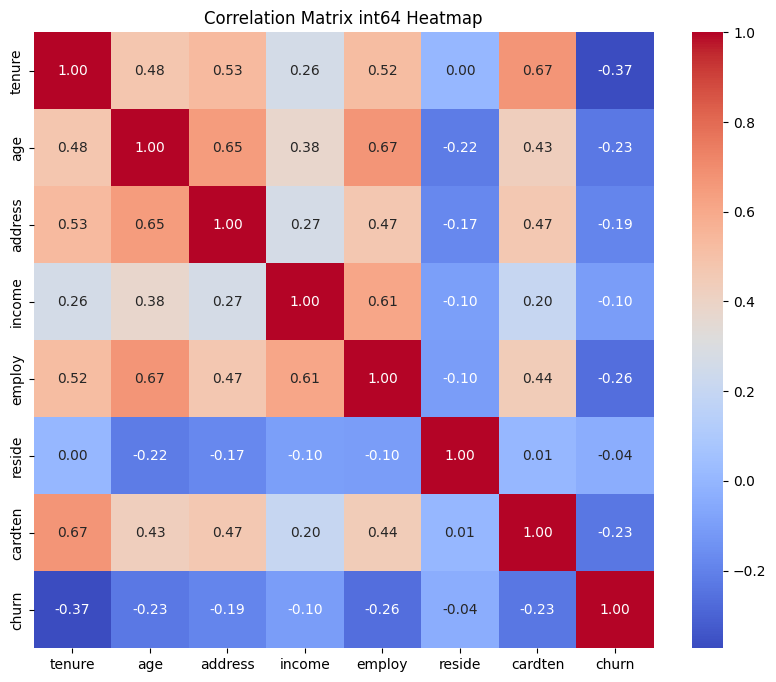

In [ ]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the heatmap
plt.title("Correlation Matrix int64 Heatmap")
plt.show()

From the heatmap we see that tenure, age, employ and cardten correlates with churn.
*   tenure/churn -0.37, interprets a negative relationship. The longer the customer has been with us, then the less likely they will churn or cancel service.
*   age/churn -0.23, interprets a moderate negative relationship. The older the customer is, then the less likely they will churn or cancel service.
*   employ/churn -0.26, interprets a moderate negative relationship. The more years of employment a customer has, then the less likely they will churn or cancel service.
*   cardten/churn -0.23, interprets a moderate negative relationship. The more calling card usage over the ten months, then the less likely the customer will churn or cancel service.



#### 2.35 Heatmap w/ Float64 Data Type

In [ ]:
df_float64.head()

,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,wireten,loglong,lninc
0,3.70,0.0,0.0,7.50,0.0,37.45,0.00,0.0,0.0,1.308,4.159
1,18.15,18.0,0.0,30.25,0.0,1300.60,1247.20,0.0,0.0,2.899,4.754
2,6.30,0.0,0.0,0.00,0.0,157.05,0.00,0.0,0.0,1.841,3.401
3,10.90,0.0,0.0,8.75,0.0,504.50,0.00,0.0,0.0,2.389,2.944
4,9.75,28.5,0.0,12.00,0.0,449.05,1240.15,0.0,0.0,2.277,5.112


In [ ]:
columns_to_select = ['longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'longten', 'tollten', 'equipten', 'wireten', 'loglong', 'lninc', 'churn']
df_analyze = df[columns_to_select]

print(df_analyze)

     longmon  tollmon  equipmon  cardmon  wiremon  longten  tollten  equipten  \
0       3.70     0.00       0.0     7.50      0.0    37.45     0.00      0.00   
1      18.15    18.00       0.0    30.25      0.0  1300.60  1247.20      0.00   
2       6.30     0.00       0.0     0.00      0.0   157.05     0.00      0.00   
3      10.90     0.00       0.0     8.75      0.0   504.50     0.00      0.00   
4       9.75    28.50       0.0    12.00      0.0   449.05  1240.15      0.00   
..       ...      ...       ...      ...      ...      ...      ...       ...   
995    15.00    45.25       0.0    52.75      0.0   817.85  2320.25      0.00   
996     4.95    19.00       0.0    13.50      0.0   153.50   649.35      0.00   
997     3.70    16.50      42.5     0.00     33.1    40.55   207.35    547.95   
998     4.65     0.00      25.6     0.00      0.0    29.35     0.00    179.10   
999    25.60    33.50       0.0    25.25      0.0  1841.85  2368.20      0.00   

     wireten  loglong  lnin

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_analyze.corr()

# Display the correlation matrix
print(correlation_matrix)

           longmon   tollmon  equipmon   cardmon   wiremon   longten  \
longmon   1.000000  0.132686 -0.043699  0.465429  0.070288  0.980346   
tollmon   0.132686  1.000000  0.070591  0.336954  0.462594  0.133696   
equipmon -0.043699  0.070591  1.000000 -0.003648  0.534480 -0.043922   
cardmon   0.465429  0.336954 -0.003648  1.000000  0.267844  0.485595   
wiremon   0.070288  0.462594  0.534480  0.267844  1.000000  0.073068   
longten   0.980346  0.133696 -0.043922  0.485595  0.073068  1.000000   
tollten   0.345019  0.801161  0.064685  0.375519  0.464628  0.361976   
equipten  0.202495  0.140615  0.811252  0.164978  0.522799  0.208251   
wireten   0.216786  0.448021  0.425448  0.283412  0.894722  0.226655   
loglong   0.871126  0.173010 -0.061391  0.453414  0.097626  0.817737   
lninc     0.250000  0.190633  0.031592  0.215430  0.141402  0.266258   
churn    -0.251933 -0.084972  0.205073 -0.166789  0.047560 -0.256774   

           tollten  equipten   wireten   loglong     lninc     

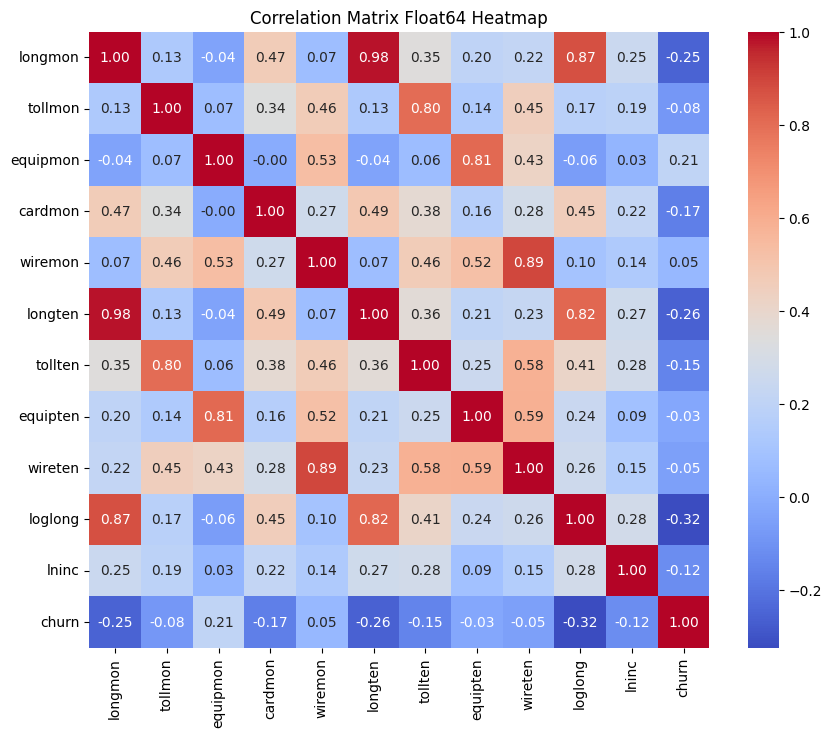

In [ ]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the heatmap
plt.title("Correlation Matrix Float64 Heatmap")
plt.show()

From the heatmap we see that longmon, equipmon, longten and loglong correlates with churn.
*   longmon/churn -0.25, interprets a moderate negative relationship. The higher the long distance monthly charge, the less likely a customer will cancel our service. This is interesting as it shows our customer is satisfy with our rates that we charge for long distance calls.
*   equipmon/churn 0.21, interprets a positive relationship. The higher the equipment monthly charge, the more likley the customer will churn and cancel service.
*   longten/churn -0.26, interprets a moderate negative relationship. Similar to longmon, customers are fine with long distance charges and rates.
*   loglong/churn -0.32, interprets a negative relationship. The higher amount of longdistance, the less likely a customer will churn. Thus solidfies our analysis earleir about long distance service satisfying customers.

#### 2.36 Heatmap w/ Variables of Interest Iteration 2

From the analysis of heatmaps prior, we decided to use the following variables to be tested and used for model development.

*   internet, boolean. Either a customer has internet service or not with us
*   age, numerical. Years of age of customer.
*   ebill, boolean. Either the customer has electronic billing or not with us.
*   tenure, numerical. Years of relationship we have with customer.
*   employ, numerical. Years of employment of customer.
*   equip, boolean. Either the customer is renting equipment or not with us.
*   equipmon, float. Monthly charges the customer pays for renting our equipment.



In [ ]:
columns_to_select = ['internet', 'age', 'ebill', 'tenure', 'employ', 'equip', 'equipmon', 'churn']
df_interest = df[columns_to_select]

print(df_interest)

     internet  age  ebill  tenure  employ  equip  equipmon  churn
0           0   44      0      13       5      0       0.0      1
1           0   52      0      68      29      0       0.0      0
2           0   30      0      23       2      0       0.0      0
3           1   22      1      45       4      0       0.0      1
4           0   59      0      45      31      0       0.0      0
..        ...  ...    ...     ...     ...    ...       ...    ...
995         0   43      0      50       4      0       0.0      0
996         1   52      0      34      19      0       0.0      0
997         1   46      1      15       1      1      42.5      1
998         0   34      0       7       5      1      25.6      0
999         0   49      0      70      22      0       0.0      0

[1000 rows x 8 columns]


In [ ]:
# Compute the correlation matrix
correlation_matrix = df_interest.corr()

# Display the correlation matrix
print(correlation_matrix)

          internet       age     ebill    tenure    employ     equip  \
internet  1.000000 -0.125210  0.508070 -0.151570 -0.200817  0.578028   
age      -0.125210  1.000000 -0.094505  0.475715  0.667698 -0.126211   
ebill     0.508070 -0.094505  1.000000 -0.104075 -0.135285  0.579580   
tenure   -0.151570  0.475715 -0.104075  1.000000  0.520837 -0.156038   
employ   -0.200817  0.667698 -0.135285  0.520837  1.000000 -0.198607   
equip     0.578028 -0.126211  0.579580 -0.156038 -0.198607  1.000000   
equipmon  0.586561 -0.087599  0.574096 -0.060533 -0.159914  0.939953   
churn     0.310136 -0.229835  0.229782 -0.373287 -0.263677  0.267653   

          equipmon     churn  
internet  0.586561  0.310136  
age      -0.087599 -0.229835  
ebill     0.574096  0.229782  
tenure   -0.060533 -0.373287  
employ   -0.159914 -0.263677  
equip     0.939953  0.267653  
equipmon  1.000000  0.205073  
churn     0.205073  1.000000  


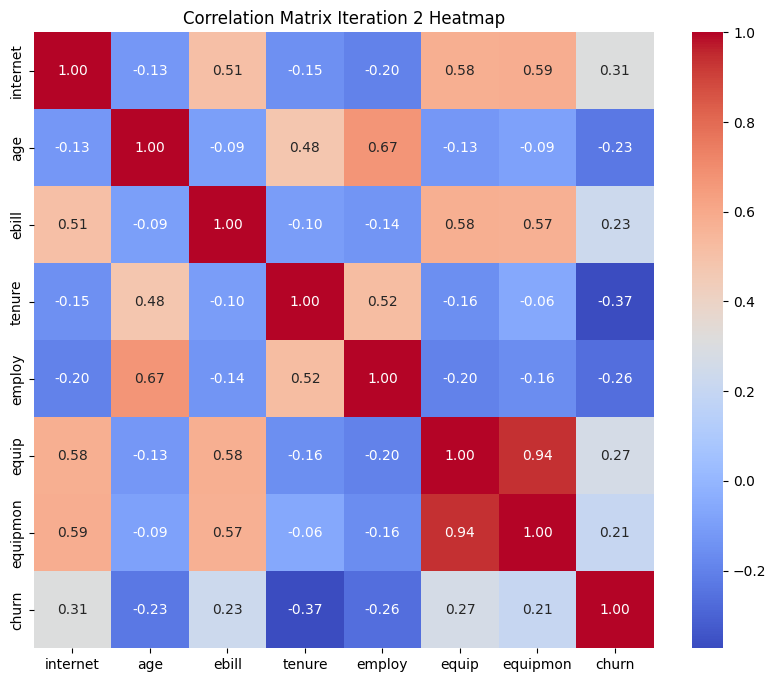

In [ ]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the heatmap
plt.title("Correlation Matrix Iteration 2 Heatmap")
plt.show()

Variable of Interest Analysis

Correlation towards churn seems to be acceptable now as attributes have relationship numbers of either below -0.2 or above 0.2 when against churn.

Variable Impact Recap

*   Customers that have internet service with us are likely to churn or cancel service.
*   Older customers are less likely to churn or cancel service.
*   Customers enrolled with electronic billing are likely to churn or cancel service.
*   Customers with high tenure(relationship years) are less likely to churn or cancel service.
*   Customers with higher years of employment are less likely to churn or cancel service.
*   Customers renting equipment are likely to churn and cancel service.
*   Higher monthly equipment charges the more likely a customer will churn and cancel service.



## 3. Model Development

#### 3.1 Data Balancing

First we need to identify the distribution of our target variable churn. If distribution of output are not close than it is determine not to be balanced.

In [ ]:
# Examine the porportion of target variable for data set
target = df_interest['churn']
print(target.value_counts(normalize=True))

churn
0    0.742
1    0.258
Name: proportion, dtype: float64


We see a gap of roughly 50%, we can conclude that the data is not balanced and need to take further steps.

Why this is alarming is because it may lead our models to be biased, as the model might predict the majority class often. In which case it will predict No.

Solution to this is utilizing a 'Resampling Technique'
*   Undersampling the majority class, reduce majority instances of N or 0



In [ ]:
# Partition the data
predictors = df_interest.drop(['churn'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)


(700, 7) (300, 7) (700,) (300,)


In [ ]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['churn'] == 0]
minority_df = combined_train_df[combined_train_df['churn'] == 1]

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=62)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=62)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['churn'])
target_train = balanced_data['churn']

In [ ]:
# Examine the porportion of target variable for train set
print(target_train.value_counts(normalize=True), target_train.shape)

churn
1    0.5
0    0.5
Name: proportion, dtype: float64 (342,)


In [ ]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

churn
0    0.71
1    0.29
Name: proportion, dtype: float64


Data balancing has been completed, we have undersample the majority class 0 and put it as part of our training set. While 30% of our df interest population will be our testing dataset.

### 3.2 Decision Tree Method

**Model Description**

Decision Tree is a supervised machine learning model used for classification and regression tasks. It works by recursively splitting the dataset into subsets based on feature values, creating a tree-like structure. At each node, the algorithm chooses the feature that best separates the data into distinct classes, making predictions based on the path from the root node to a leaf node. Decision trees are intuitive and easy to interpret, as they provide a clear visual representation of decision-making rules.

In [ ]:
# Build a decision tree model on training data
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
model.fit(predictors_train, target_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

[Text(0.5769230769230769, 0.875, 'tenure <= 33.5\nentropy = 1.0\nsamples = 342\nvalue = [171, 171]\nclass = No'),
 Text(0.3076923076923077, 0.625, 'equip <= 0.5\nentropy = 0.92\nsamples = 209\nvalue = [70, 139]\nclass = Yes'),
 Text(0.15384615384615385, 0.375, 'employ <= 3.5\nentropy = 0.997\nsamples = 98\nvalue = [52, 46]\nclass = No'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.959\nsamples = 55\nvalue = [21, 34]\nclass = Yes'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.854\nsamples = 43\nvalue = [31, 12]\nclass = No'),
 Text(0.46153846153846156, 0.375, 'tenure <= 3.5\nentropy = 0.639\nsamples = 111\nvalue = [18, 93]\nclass = Yes'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18]\nclass = Yes'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.709\nsamples = 93\nvalue = [18, 75]\nclass = Yes'),
 Text(0.8461538461538461, 0.625, 'employ <= 23.5\nentropy = 0.796\nsamples = 133\nvalue = [101, 32]\nclass = No'),
 Text(0.7692307692307693, 0.375, 'age <

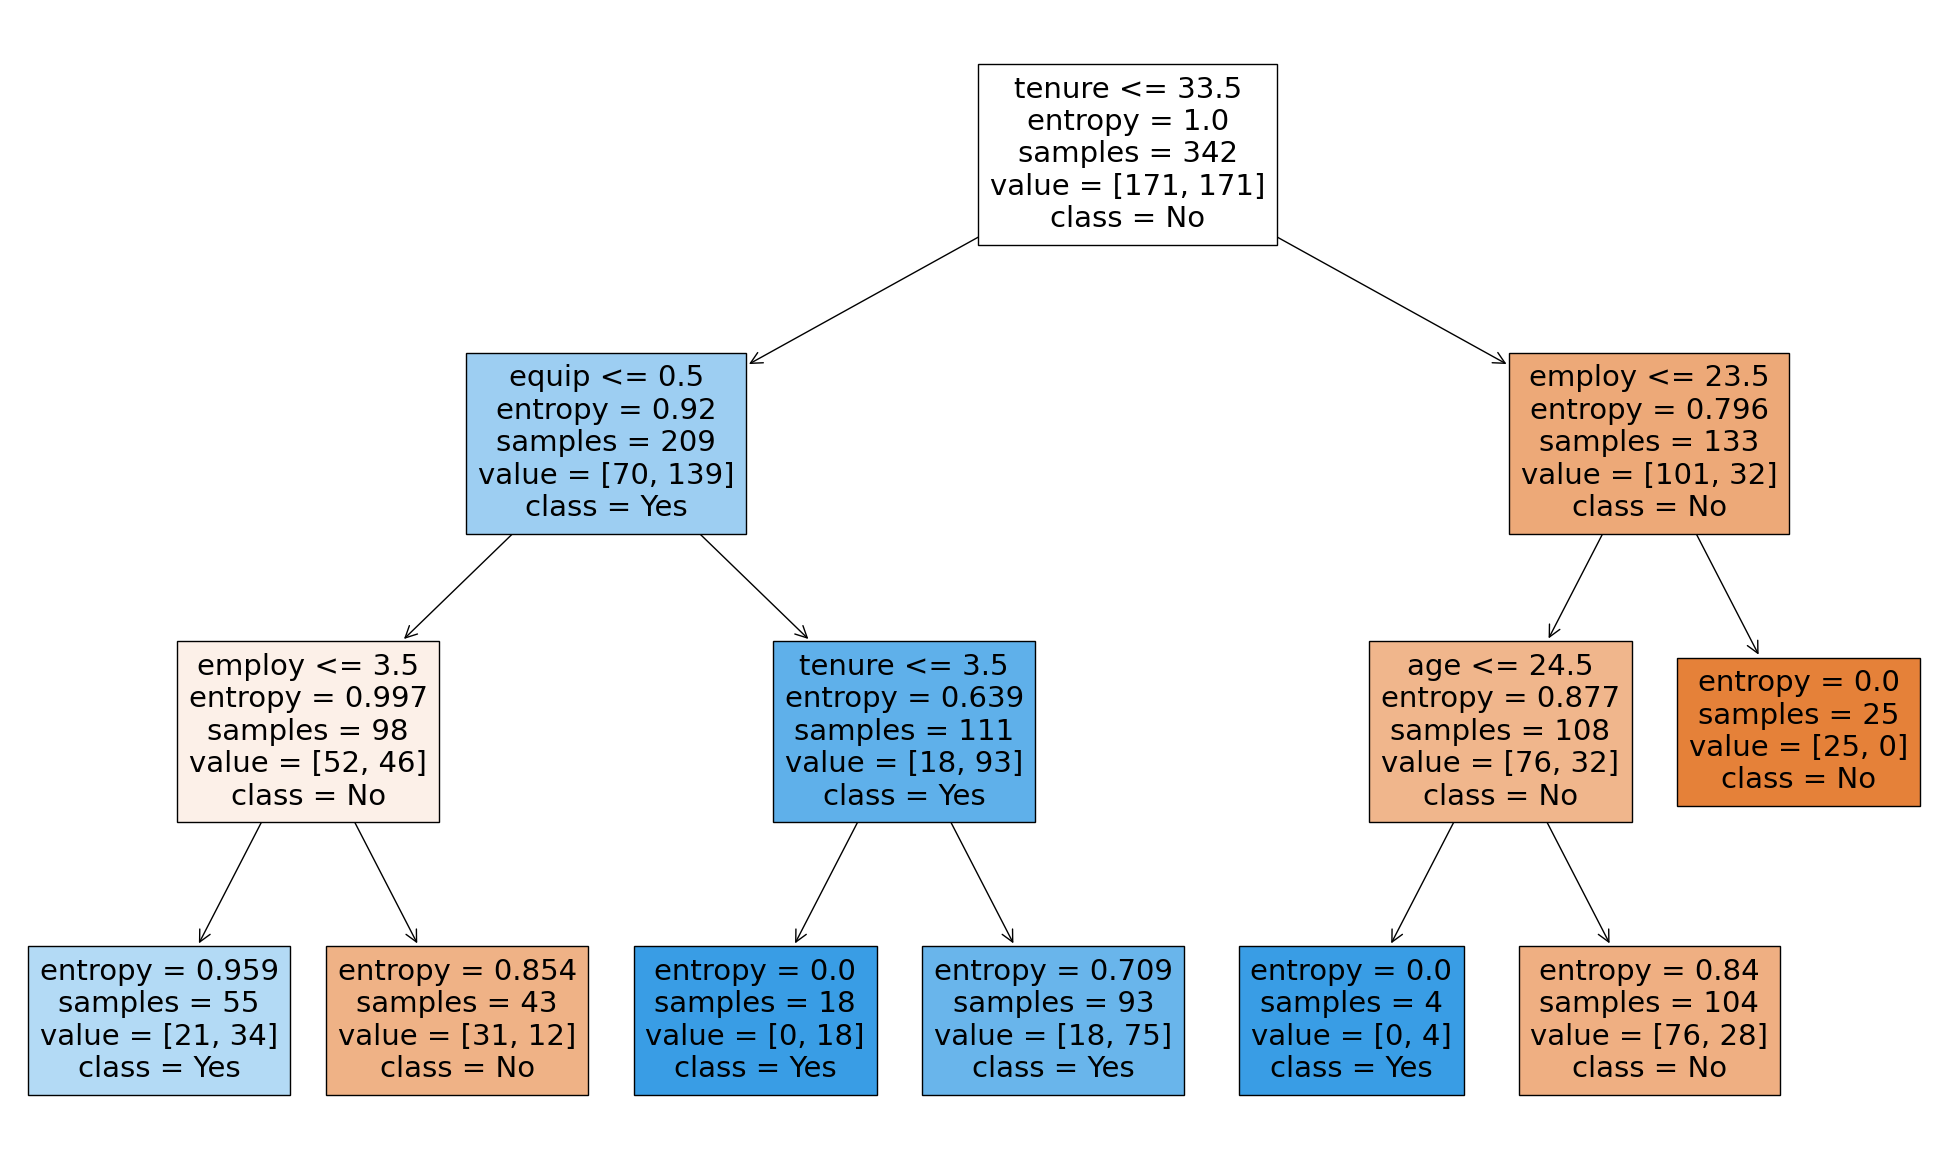

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

Tenure <= 33.5 years is identified as the more important attribute to split upon. First splits attributes are equip and employ <= 23.5 years.

In [ ]:
# Text version of decision tree
print(tree.export_text(model, feature_names=list(df_interest.columns)[1:]))

|--- employ <= 33.50
|   |--- equipmon <= 0.50
|   |   |--- equip <= 3.50
|   |   |   |--- class: 1
|   |   |--- equip >  3.50
|   |   |   |--- class: 0
|   |--- equipmon >  0.50
|   |   |--- employ <= 3.50
|   |   |   |--- class: 1
|   |   |--- employ >  3.50
|   |   |   |--- class: 1
|--- employ >  33.50
|   |--- equip <= 23.50
|   |   |--- ebill <= 24.50
|   |   |   |--- class: 1
|   |   |--- ebill >  24.50
|   |   |   |--- class: 0
|   |--- equip >  23.50
|   |   |--- class: 0



In [ ]:
# Make predictions on testing data
prediction_on_test = model.predict(predictors_test)

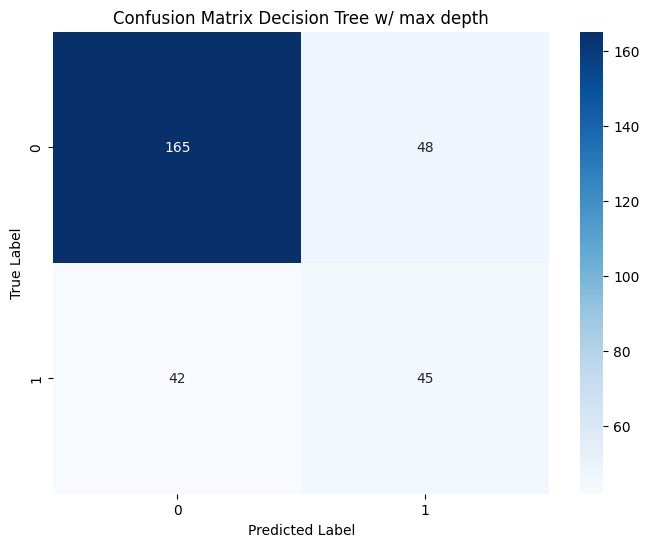

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(target_test, prediction_on_test)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix Decision Tree w/ max depth')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       213
           1       0.48      0.52      0.50        87

    accuracy                           0.70       300
   macro avg       0.64      0.65      0.64       300
weighted avg       0.71      0.70      0.70       300



With an accuracy of 0.70, f1-score of N=0.79 and Y=0.5. Overall model can predict customers not to churn but cannot predict those that will churn effectively.

[Text(0.5833333333333334, 0.9736842105263158, 'tenure <= 33.5\nentropy = 1.0\nsamples = 342\nvalue = [171, 171]\nclass = No'),
 Text(0.32936507936507936, 0.9210526315789473, 'equip <= 0.5\nentropy = 0.92\nsamples = 209\nvalue = [70, 139]\nclass = Yes'),
 Text(0.21428571428571427, 0.868421052631579, 'employ <= 3.5\nentropy = 0.997\nsamples = 98\nvalue = [52, 46]\nclass = No'),
 Text(0.11904761904761904, 0.8157894736842105, 'tenure <= 20.5\nentropy = 0.959\nsamples = 55\nvalue = [21, 34]\nclass = Yes'),
 Text(0.0873015873015873, 0.7631578947368421, 'age <= 40.5\nentropy = 0.89\nsamples = 39\nvalue = [12, 27]\nclass = Yes'),
 Text(0.07142857142857142, 0.7105263157894737, 'employ <= 2.5\nentropy = 0.954\nsamples = 32\nvalue = [12, 20]\nclass = Yes'),
 Text(0.05555555555555555, 0.6578947368421053, 'tenure <= 2.5\nentropy = 0.918\nsamples = 30\nvalue = [10, 20]\nclass = Yes'),
 Text(0.03968253968253968, 0.6052631578947368, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(0.0

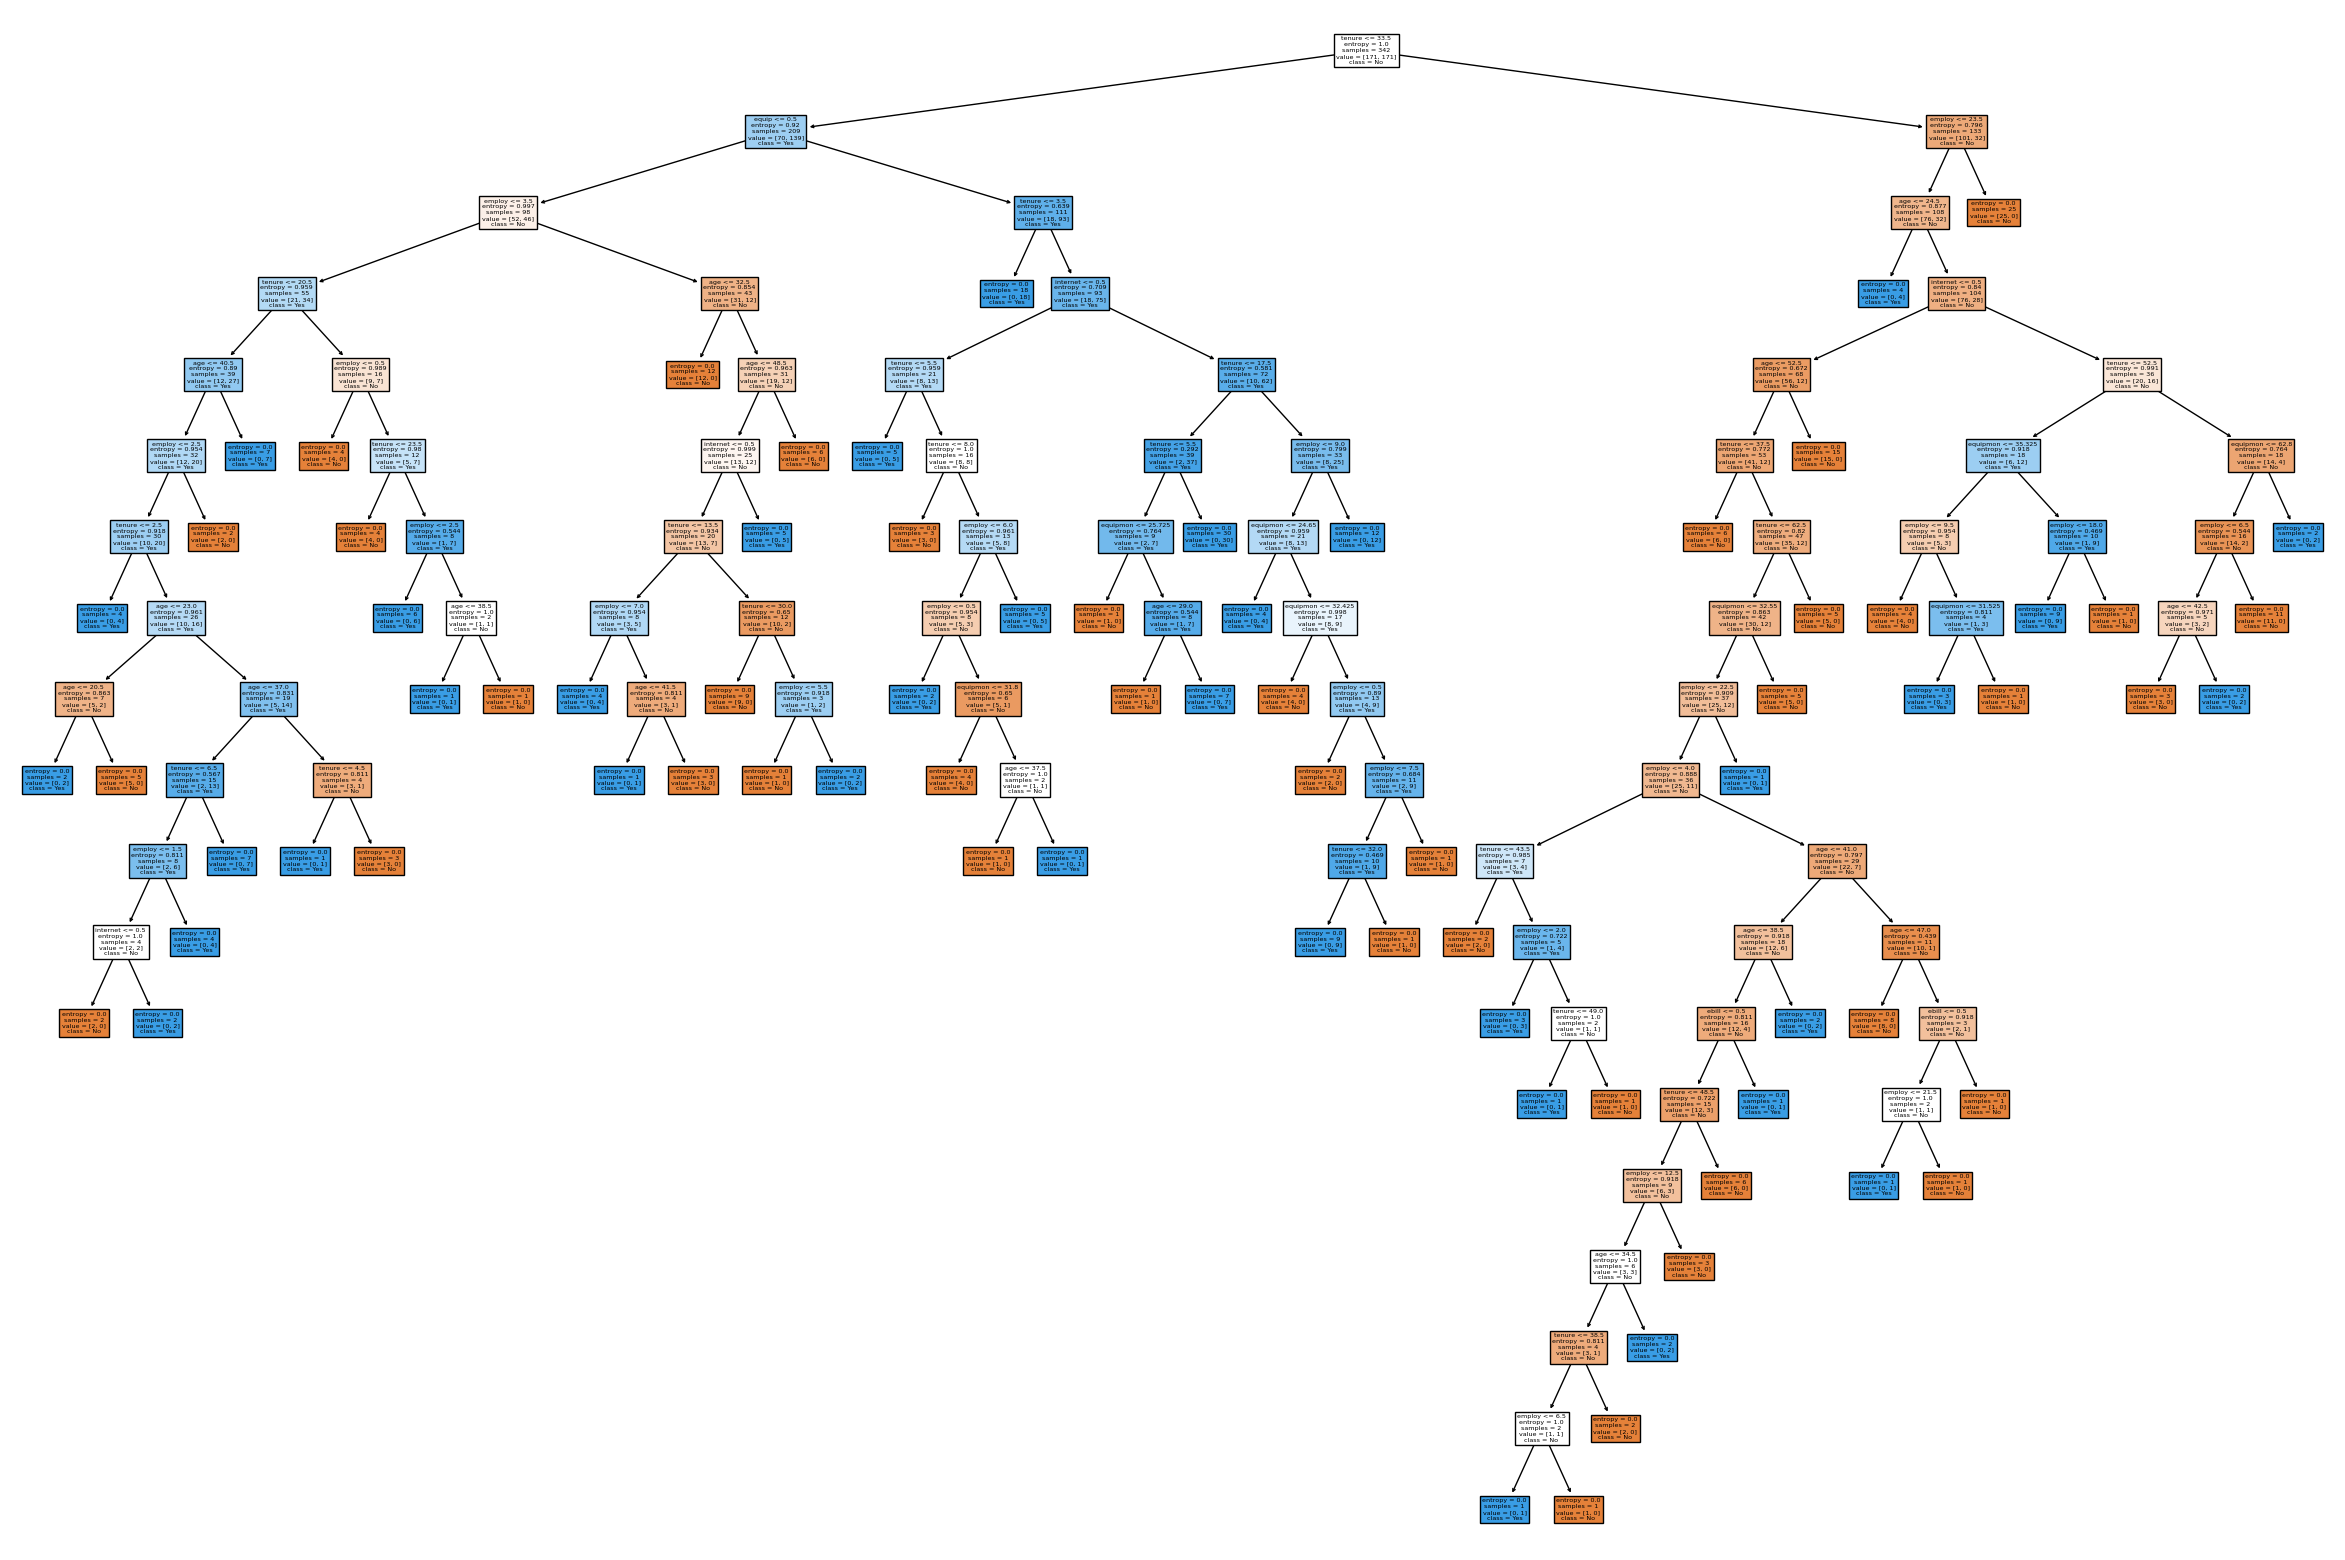

In [ ]:
# Build a decision tree model on training data
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1)
model.fit(predictors_train, target_train)

# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [ ]:
# Make predictions on testing data
prediction_on_test = model.predict(predictors_test)

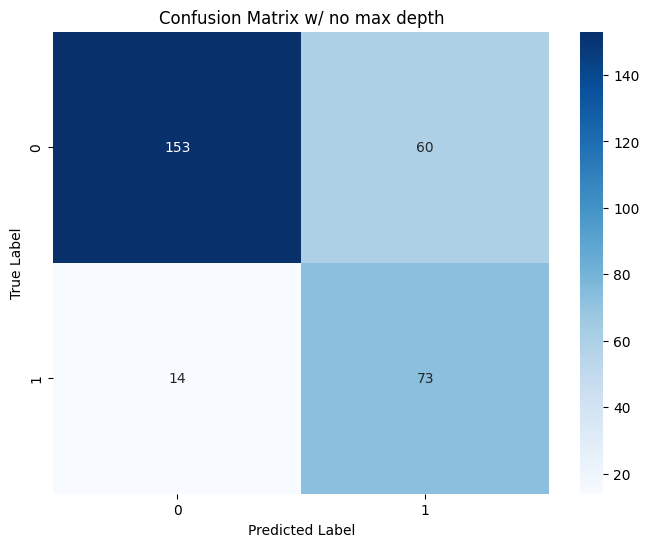

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(target_test, prediction_on_test)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix w/ no max depth')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       213
           1       0.55      0.84      0.66        87

    accuracy                           0.75       300
   macro avg       0.73      0.78      0.73       300
weighted avg       0.81      0.75      0.76       300



If we remove max depth we see improvement to our f1-scores. And an accuracy increase of 0.05, but our prediction for churn is still not as effective with an f1 score of 0.66

Overall Decision Tree seems to be a poor model to use as it doesn't predict churn effectively.


### 3.3 Logistics Regression

**Model Description**

Logistic Regression is a supervised machine learning algorithm used for binary classification tasks. It estimates the probability that an instance belongs to a particular class by fitting a linear relationship between the input features and the log-odds of the outcome. The model uses the sigmoid function to transform these log-odds into probabilities, making it suitable for predicting binary outcomes such as churn (yes/no). Logistic regression is widely used for its simplicity and interpretability.

In [ ]:
# Split the balanced_data into predictors (X) and target (y)
predictors_train = balanced_data.drop(columns=['churn'])  # Features
target_train = balanced_data['churn']  # Target variable

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Train the model using the undersampled data
log_reg.fit(predictors_train, target_train)

# Make predictions on the test set (e.g., df_interest)
X_test = df_interest[predictors_train.columns]  # Ensure matching features
y_test = df_interest['churn']  # Target from df_interest

y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.754
Confusion Matrix:
[[568 174]
 [ 72 186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       742
           1       0.52      0.72      0.60       258

    accuracy                           0.75      1000
   macro avg       0.70      0.74      0.71      1000
weighted avg       0.79      0.75      0.77      1000



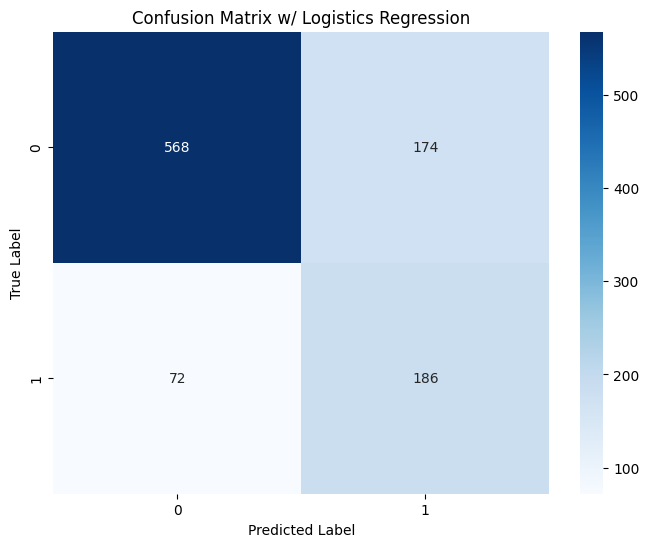

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix w/ Logistics Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Logistics regression underperforms in predicting not churn compared to decision tree. We see that overall accuracy is 0.75 and f1 values are not much better.

### 3.4 Random Forest Model

**Model Description**

Random Forest is an ensemble machine learning algorithm used for both classification and regression tasks. It operates by constructing multiple decision trees during training and outputs the class (in classification) or average prediction (in regression) from all the trees. Each tree is built from a random subset of the data and features, which helps reduce overfitting and improves model accuracy. The Random Forest model is powerful, robust to noise, and provides insights into feature importance by averaging results from multiple decision trees.

In [ ]:
# Split the balanced_data into predictors (X) and target (y)
predictors_train = balanced_data.drop(columns=['churn'])  # Features from the balanced data
target_train = balanced_data['churn']  # Target variable from the balanced data

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model using the balanced training data
rf.fit(predictors_train, target_train)

# Make predictions on the test set (df_interest)
X_test = df_interest[predictors_train.columns]  # Ensure matching features in the test set
y_test = df_interest['churn']  # Target variable from the test set

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.882
Confusion Matrix:
[[644  98]
 [ 20 238]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       742
           1       0.71      0.92      0.80       258

    accuracy                           0.88      1000
   macro avg       0.84      0.90      0.86      1000
weighted avg       0.90      0.88      0.89      1000



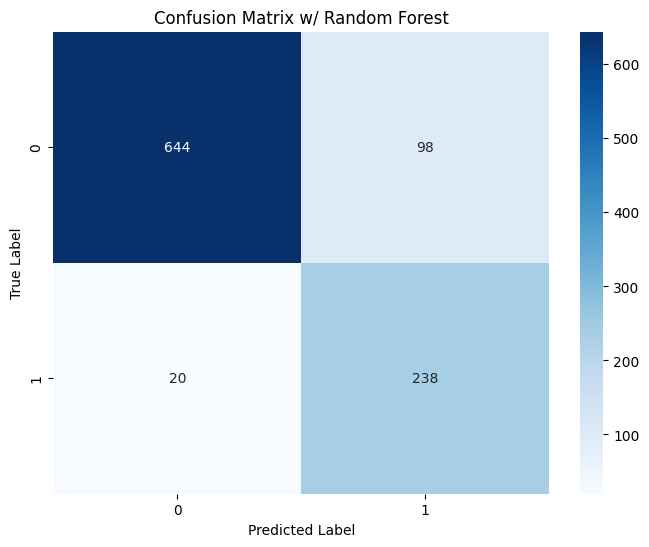

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix w/ Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Random Forest performs exceptionally well!
*   Accuracy is 0.88, which is superb for predicting.
*   F1-score(0) 0.92 is predicting our non-churn well.
*   F1-score(1) 0.80 is predicting our churn decently, not as strong compared to churn. But best result by far.





### 3.5 Artificial Neural Network

**Model Description**

Artificial Neural Network (ANN) is a machine learning model inspired by the structure of the human brain. It consists of layers of interconnected nodes (neurons) that process input data to learn patterns and relationships. ANNs are typically composed of an input layer, one or more hidden layers, and an output layer. Each neuron applies a weighted sum of the inputs followed by an activation function to introduce non-linearity. ANNs are highly flexible and capable of capturing complex, non-linear relationships in the data, making them effective for a wide range of tasks, including classification and regression.

In [ ]:
# Prepare the data (using balanced_data for training)
predictors_train = balanced_data.drop(columns=['churn'])  # Features from the balanced data
target_train = balanced_data['churn']  # Target variable from the balanced data

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(predictors_train)

# Scale the test set (df_interest)
X_test = df_interest[predictors_train.columns]  # Ensure matching features
y_test = df_interest['churn']  # Target from df_interest
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()

# Input layer with the same number of neurons as input features
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Hidden layer(s)
model.add(Dense(units=32, activation='relu'))

# Output layer (binary classification, hence 1 output neuron with sigmoid activation)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, target_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary output

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3707 - loss: 0.7389
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7001 - loss: 0.6360 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7540 - loss: 0.5833 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7471 - loss: 0.5447 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - loss: 0.5178 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7907 - loss: 0.4913 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7649 - loss: 0.5040 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7582 - loss: 0.5124 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4714 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7963 - loss: 0.4767 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7963 - loss: 0.4761 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8131 - los

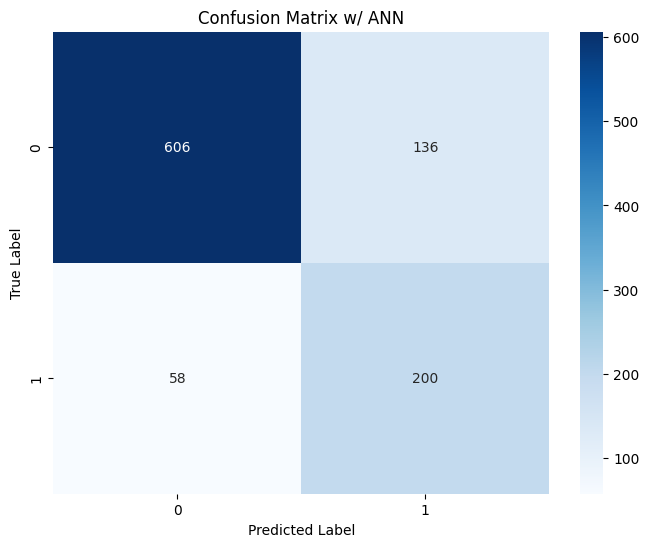

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix w/ ANN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 4. Results and Comparisons

Recap we used the following models and now we want to compare them to determine which is the best.

1.   Decision Tree
2.   Logistics Regression
3.   Random Forest
4.   Artificial Neural Network



### 4.1 Perform a 5-fold cross validation

**What is 5-fold cross validation**

5-Fold Cross-Validation is a model evaluation technique that divides the dataset into 5 equal parts or "folds." The model is trained on 4 of these folds and tested on the remaining fold. This process is repeated 5 times, each time using a different fold for testing and the other 4 for training. The final performance of the model is averaged across all 5 iterations, providing a more reliable estimate of model accuracy by reducing bias and variance that can arise from a single train-test split.

In [ ]:
# Function to create ANN model
def create_ann_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prepare the data (using balanced_data for cross-validation)
predictors = balanced_data.drop(columns=['churn'])
target = balanced_data['churn']

# Scale the data
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

# Prepare df_interest for testing after cross-validation
X_test_interest = df_interest.drop(columns=['churn'])  # Selected features from df_interest
y_test_interest = df_interest['churn']  # Target from df_interest
X_test_interest_scaled = scaler.transform(X_test_interest)  # Scale the test set

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Store accuracies for each model
log_reg_accuracies = []
decision_tree_accuracies = []
random_forest_accuracies = []
ann_accuracies = []

# Perform cross-validation
for train_index, test_index in kf.split(predictors_scaled):
    # Split the data into training and validation sets
    X_train_fold, X_test_fold = predictors_scaled[train_index], predictors_scaled[test_index]
    y_train_fold, y_test_fold = target.iloc[train_index], target.iloc[test_index]

    # Logistic Regression
    log_reg.fit(X_train_fold, y_train_fold)
    y_pred_log_reg = log_reg.predict(X_test_fold)
    log_reg_accuracies.append(accuracy_score(y_test_fold, y_pred_log_reg))

    # Decision Tree
    decision_tree.fit(X_train_fold, y_train_fold)
    y_pred_decision_tree = decision_tree.predict(X_test_fold)
    decision_tree_accuracies.append(accuracy_score(y_test_fold, y_pred_decision_tree))

    # Random Forest
    random_forest.fit(X_train_fold, y_train_fold)
    y_pred_random_forest = random_forest.predict(X_test_fold)
    random_forest_accuracies.append(accuracy_score(y_test_fold, y_pred_random_forest))

    # ANN (requires re-initializing for each fold)
    model = create_ann_model(X_train_fold.shape[1])
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)
    y_pred_ann_prob = model.predict(X_test_fold)
    y_pred_ann = (y_pred_ann_prob > 0.5).astype(int).flatten()
    ann_accuracies.append(accuracy_score(y_test_fold, y_pred_ann))

# Step 4: Evaluate models on df_interest (final test set)
# Logistic Regression on df_interest
y_pred_log_reg_test = log_reg.predict(X_test_interest_scaled)
log_reg_test_accuracy = accuracy_score(y_test_interest, y_pred_log_reg_test)

# Decision Tree on df_interest
y_pred_decision_tree_test = decision_tree.predict(X_test_interest_scaled)
decision_tree_test_accuracy = accuracy_score(y_test_interest, y_pred_decision_tree_test)

# Random Forest on df_interest
y_pred_random_forest_test = random_forest.predict(X_test_interest_scaled)
random_forest_test_accuracy = accuracy_score(y_test_interest, y_pred_random_forest_test)

# ANN on df_interest
model_ann_final = create_ann_model(X_train_fold.shape[1])
model_ann_final.fit(predictors_scaled, target, epochs=50, batch_size=32, verbose=0)
y_pred_ann_test_prob = model_ann_final.predict(X_test_interest_scaled)
y_pred_ann_test = (y_pred_ann_test_prob > 0.5).astype(int).flatten()
ann_test_accuracy = accuracy_score(y_test_interest, y_pred_ann_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Step 5: Print accuracies from 5-fold cross-validation
print(f"Logistic Regression Cross-Validation Average Accuracy: {np.mean(log_reg_accuracies)}")
print(f"Decision Tree Cross-Validation Average Accuracy: {np.mean(decision_tree_accuracies)}")
print(f"Random Forest Cross-Validation Average Accuracy: {np.mean(random_forest_accuracies)}")
print(f"ANN Cross-Validation Average Accuracy: {np.mean(ann_accuracies)}")


Logistic Regression Cross-Validation Average Accuracy: 0.7722506393861892
Decision Tree Cross-Validation Average Accuracy: 0.731074168797954
Random Forest Cross-Validation Average Accuracy: 0.7840579710144928
ANN Cross-Validation Average Accuracy: 0.742838874680307


In [ ]:
# Step 6: Print final test set accuracies (df_interest)
print(f"Logistic Regression Accuracy on df_interest: {log_reg_test_accuracy}")
print(f"Decision Tree Accuracy on df_interest: {decision_tree_test_accuracy}")
print(f"Random Forest Accuracy on df_interest: {random_forest_test_accuracy}")
print(f"ANN Accuracy on df_interest: {ann_test_accuracy}")


Logistic Regression Accuracy on df_interest: 0.762
Decision Tree Accuracy on df_interest: 0.806
Random Forest Accuracy on df_interest: 0.876
ANN Accuracy on df_interest: 0.788


Comparing performance, Random Forest leads with an average accuracy of 0.78. But also from previous discussion f1 values are high against the test data for both identfying 0 and 1 of churns.

Using variables of interest we can fine tune accuracy of random forest to 0.876
Recap the variables of interest are:
*   internet
*   age
*   ebill
*   tenure
*   employ
*   equip
*   equipmon



### 4.2 Comparison

Compare the performance of your models by their accuracy, sensitivity, and tools like confusion
matrices and ROC curves

In [ ]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()

# Define a function to plot ROC curve
def plot_roc_curve(y_test, y_pred_prob, title):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {title}')
    plt.legend()
    plt.show()

# Train and evaluate models (already trained earlier)

# Logistic Regression
y_pred_log_reg_test = log_reg.predict(X_test_interest_scaled)
y_pred_log_reg_prob = log_reg.predict_proba(X_test_interest_scaled)[:, 1]  # Probabilities for ROC curve
log_reg_accuracy = accuracy_score(y_test_interest, y_pred_log_reg_test)
log_reg_report = classification_report(y_test_interest, y_pred_log_reg_test)

# Decision Tree
y_pred_decision_tree_test = decision_tree.predict(X_test_interest_scaled)
y_pred_decision_tree_prob = decision_tree.predict_proba(X_test_interest_scaled)[:, 1]  # Probabilities for ROC curve
decision_tree_accuracy = accuracy_score(y_test_interest, y_pred_decision_tree_test)
decision_tree_report = classification_report(y_test_interest, y_pred_decision_tree_test)

# Random Forest
y_pred_random_forest_test = random_forest.predict(X_test_interest_scaled)
y_pred_random_forest_prob = random_forest.predict_proba(X_test_interest_scaled)[:, 1]  # Probabilities for ROC curve
random_forest_accuracy = accuracy_score(y_test_interest, y_pred_random_forest_test)
random_forest_report = classification_report(y_test_interest, y_pred_random_forest_test)

# ANN
y_pred_ann_test_prob = model_ann_final.predict(X_test_interest_scaled)
y_pred_ann_test = (y_pred_ann_test_prob > 0.5).astype(int).flatten()
ann_accuracy = accuracy_score(y_test_interest, y_pred_ann_test)
ann_report = classification_report(y_test_interest, y_pred_ann_test)

# Print evaluation metrics

# Accuracy
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Decision Tree Accuracy: {decision_tree_accuracy}")
print(f"Random Forest Accuracy: {random_forest_accuracy}")
print(f"ANN Accuracy: {ann_accuracy}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Logistic Regression Accuracy: 0.762
Decision Tree Accuracy: 0.806
Random Forest Accuracy: 0.876
ANN Accuracy: 0.788


The model accuracy results show that the Random Forest model performed the best with an accuracy of 87.6%, followed by the Decision Tree at 80.6% and the Artificial Neural Network (ANN) at 80.2%. The Logistic Regression model had the lowest accuracy at 76.2%. Overall, the ensemble-based Random Forest outperformed the other models, likely due to its ability to handle complex interactions and reduce overfitting through the averaging of multiple decision trees.

In [ ]:
# Sensitivity (Recall) is part of the classification report
print("Logistic Regression Classification Report:\n", log_reg_report)
print("Decision Tree Classification Report:\n", decision_tree_report)
print("Random Forest Classification Report:\n", random_forest_report)
print("ANN Classification Report:\n", ann_report)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       742
           1       0.53      0.74      0.61       258

    accuracy                           0.76      1000
   macro avg       0.71      0.75      0.72      1000
weighted avg       0.80      0.76      0.77      1000

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.78      0.86       742
           1       0.58      0.87      0.70       258

    accuracy                           0.81      1000
   macro avg       0.76      0.83      0.78      1000
weighted avg       0.85      0.81      0.82      1000

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       742
           1       0.70      0.90      0.79       258

    accuracy                           0.88      1000
   macro

Classification Comparisons

F1-score for best overall performance in predicting not churn (churn=0)
1.   Random Forest 0.91
2.   Decision Tree 0.86
3.   ANN 0.86
4.   Logistics Regression 0.83

F1-score for best overall performance in predicting churn (churn=1)
1.   Random Forest 0.79
2.   Decision Tree 0.70
3.   ANN 0.66
4.   Logistics Regression 0.61

Random Forest Analysis
*   With a precision score of 0.96, model is 96 percent accurate to predict if a customer will not churn.
*   With a precision score of 0.70, model is 70 percent accurate to predict if a customer will churn.
*   With a recall score of 0.87, model correctly identifies 87 percent of customers who have not churn.
*   With a recall score of 0.90, model correctly identifies 90 percent of customers who actually churned.
*   Model has better performance on majority (churn=0) with a f1-score of 0.91 versus minority (churn=1) with a f1-score of 0.79


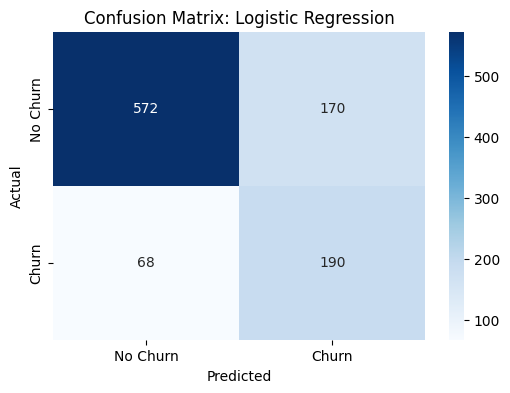

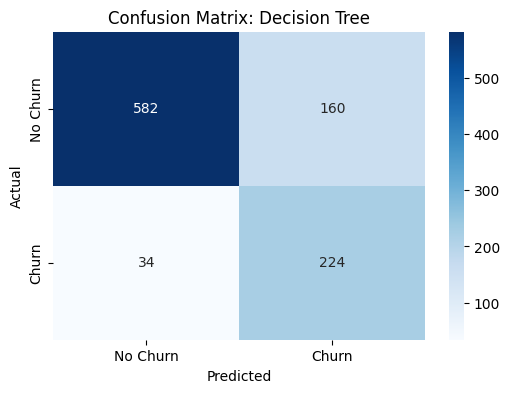

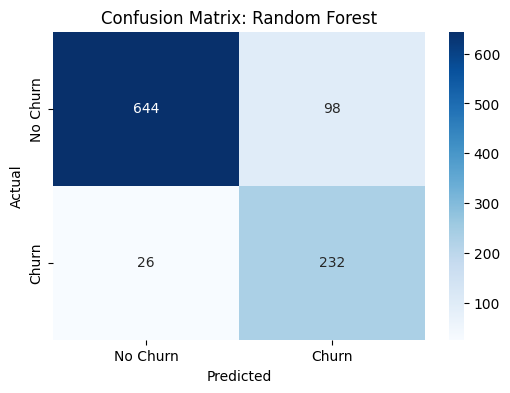

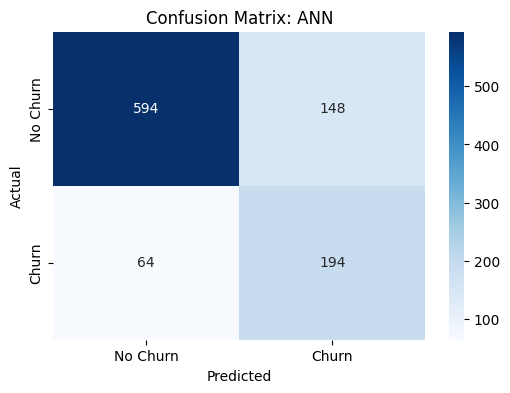

In [ ]:
# Plot confusion matrices
plot_confusion_matrix(y_test_interest, y_pred_log_reg_test, "Logistic Regression")
plot_confusion_matrix(y_test_interest, y_pred_decision_tree_test, "Decision Tree")
plot_confusion_matrix(y_test_interest, y_pred_random_forest_test, "Random Forest")
plot_confusion_matrix(y_test_interest, y_pred_ann_test, "ANN")

Random Forest Confusion Matrix

How many customers were predicted as churn?
*   330

How many churn customers were predicted as not churn?
*   26

How many churn customers were identified correctly by the model?
*   232






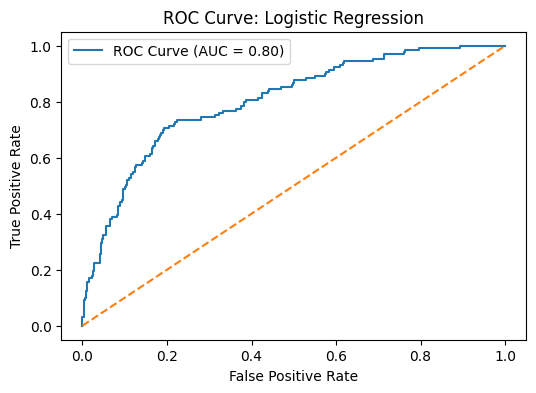

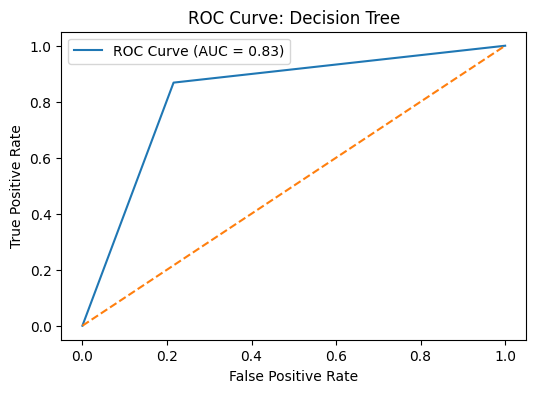

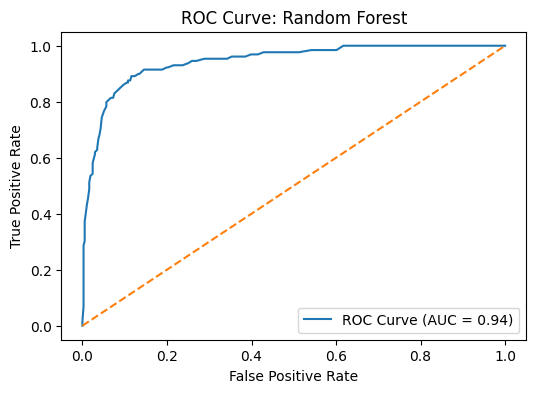

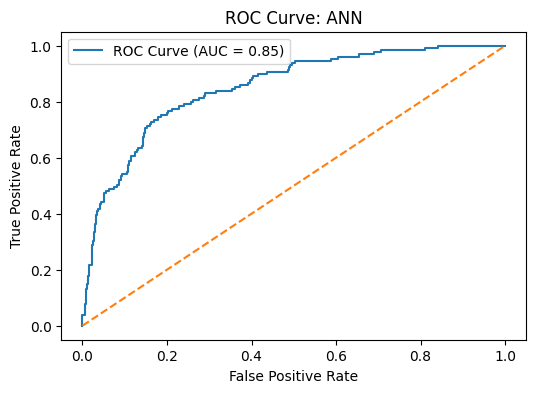

In [ ]:
# Plot ROC curves
plot_roc_curve(y_test_interest, y_pred_log_reg_prob, "Logistic Regression")
plot_roc_curve(y_test_interest, y_pred_decision_tree_prob, "Decision Tree")
plot_roc_curve(y_test_interest, y_pred_random_forest_prob, "Random Forest")
plot_roc_curve(y_test_interest, y_pred_ann_test_prob, "ANN")

Random Forest model performed well with an AUC score of 0.94 on the ROC curve, which establishes a strong ability to distinguish customers who churn and those who don't. The model achieves a high True Positive Rate (Recall) while keeping the False Positive Rate low. Its advantage comes from being an ensemble method that reduces overfitting, captures non-linear relationships, and provides a good balance between precision and recall, making it a robust choice for churn prediction compared to simpler models.

### 4.3 Highest Impact Variable


    Feature  Importance
3    tenure    0.307795
1       age    0.221473
4    employ    0.203360
6  equipmon    0.126136
0  internet    0.079370
2     ebill    0.031960
5     equip    0.029906


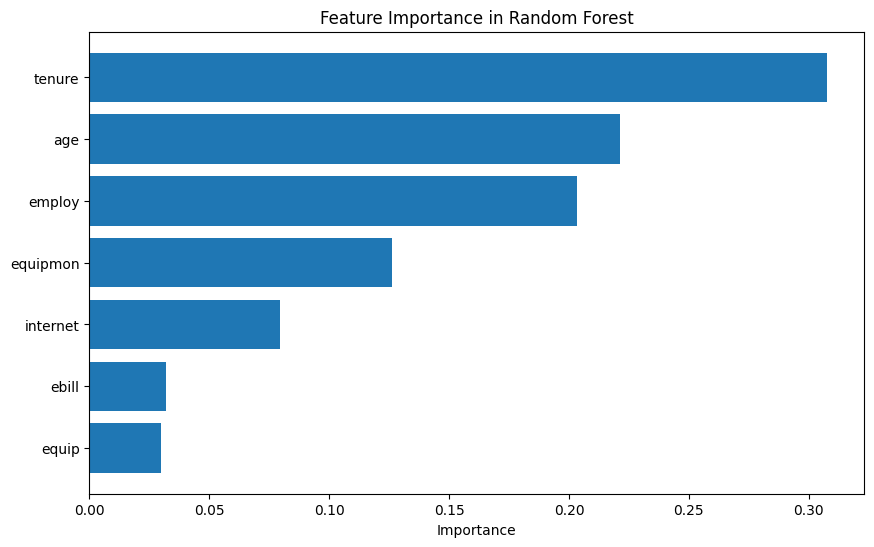

In [ ]:
# Extract feature importances
rf_feature_importances = random_forest.feature_importances_

# Create a DataFrame for better visualization
rf_feature_names = predictors_train.columns
rf_importance_df = pd.DataFrame({'Feature': rf_feature_names, 'Importance': rf_feature_importances})

# Sort the features by importance
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Print the features ranked by importance
print(rf_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'])
plt.gca().invert_yaxis()  # Invert axis to show highest importance on top
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.show()

Tenure is the highest important feature, followed by age and employment years.

## 5. Conclusion

### 5.1 Reflection Tools and Techniques

I used tools and techniques inspired by Alex Freberg, a data analytics YouTuber, who frequently employs basic Python methods like df.head() to continuously examine the data. I applied my own approach by organizing the analysis into sections, making it easier to explore the data. For instance, after using df.dtypes() to identify data types, I began grouping the data for more structured exploration. Additionally, I checked for null values, but in this case, no action (like replacing or removing records) was necessary.

One challenge I faced was dealing with too many variables to consider how each impacts churn, so I separated my testing. Currently, I'm learning methods for selecting important variables in machine learning models through my Responsible AI course at CSULB, but I wasn’t ready to apply those techniques yet. Instead, I used various charts, such as bar plots, histograms, and boxplots, which gave me a better understanding of how the features behaved individually and in relation to churn.

I then used a heatmap to visualize correlations between variables, as it's an effective tool for understanding relationships. My initial issue of having too many variables prompted me to apply a technique that focused on testing by data type in the heatmap. This approach was fairly effective and showed that the variables I selected had a meaningful influence on churn.

During the assignment, I encountered new concepts such as Artificial Neural Networks (ANN) and 5-fold cross-validation. To better understand these topics and their code implementation, I sought help from ChatGPT. One area where GPT was particularly helpful was in setting up the variables of interest for model accuracy comparison, rather than using all attributes, which made the analysis more efficient. I find that using AI tools like ChatGPT is extremely valuable for learning complex concepts and coding syntax. As professionals, it’s important to recognize the potential of this technology and use it effectively. I frequently use ChatGPT in my professional work, especially when learning new tools in Alteryx and developing code for the Formula tool.

### 5.2 Strengths and Weaknesses Models

**Random Forest**

*   Accuracy: 88%
*   ROC AUC: 0.94

*   **Strengths**: Excellent performance with both accuracy and ROC AUC. Random Forest captures complex, non-linear relationships and reduces overfitting through its ensemble method. It also provides useful insights into feature importance
*   **Weaknesses**: Less interpretable than simpler models and more computationally expensive. Slower to train compared to Logistic Regression and Decision Tree.

---
**Decision Tree**

*   Accuracy: 81%
*   ROC AUC: 0.84

*   **Strengths**: Easy to interpret and fast to train, Decision Trees provide a clear view of the decision-making process. They can model non-linear relationships and are simple to explain.
*   **Weaknesses**: Prone to overfitting, especially when the tree is deep, making it less robust than ensemble methods like Random Forest. It also has slightly lower ROC AUC compared to Random Forest and ANN.

---
**Artificial Neural Network (ANN)**

*   Accuracy: 80%
*   ROC AUC: 0.85

*   **Strengths**:  ANNs are powerful for capturing complex, non-linear patterns and tend to perform well as data size increases. They had a competitive AUC score in this analysis.
*   **Weaknesses**: Harder to interpret due to their "black-box" nature. Training can be computationally expensive and slow, and they may require more data to reach optimal performance.

---
**Logistics Regression**

*   Accuracy: 76%
*   ROC AUC: 0.80

*   **Strengths**:  Simple, fast, and highly interpretable, Logistic Regression works well for problems with a linear relationship between the features and target variable. It’s efficient and well-suited for binary classification tasks like churn prediction.
*   **Weaknesses**: Limited to capturing linear relationships, which reduces its effectiveness when the data exhibits non-linear interactions. It performed the lowest in terms of accuracy and ROC AUC.

---








### 5.3 Good and Bads

**Goods**
*   Had alot of fun with this assignment, wish we have more
*   First time testing 4 ML models, interesting to see how they each perform
*   Chart review, allows me to see how each works and their effectiveness
*   Heatmap and boxplots really helped me understand the relationships between the variables and churn.

**Bads**
*   Data dictionary was not provided, some variables I would have to make educated guesses
*   Concepts like ROC curve and five-fold, was new to me. Wish we had a review or introduction to it before the assignment.
*   Lack of professional example. Not sure if my method is the best approach. Would like to see some data scientists work.
*   Struggle to understand the complexity of ANN

**Etc**
*   Concern of runtime if working with larger datasets. Runtime took roughly a minute, but with more data we can end up to hours. Is their another way to approach?

### 5.4 Business Recommendation

We observe that years play a significant role in determining whether a customer will churn. Features such as tenure, age, and employment suggest that our target customer base is primarily middle-aged or older. To retain these customers and increase their loyalty, we need to ensure our services meet their expectations, ultimately extending each customer's tenure.

It’s important to revisit services that are linked to churn, such as electronic billing and equipment rentals. For electronic billing, we should ask ourselves: Are the bills formatted in a way that’s user-friendly, or are they causing frustration? We could explore ways to transform electronic billing into a more positive experience, perhaps by showing our appreciation for our customers. This is something worth discussing with the team responsible for preparing the bills.

Regarding equipment rentals, we should consider whether our prices are too high, and whether offering promotions could help retain customers. It might also be worth discussing whether to discontinue rentals altogether. As a service company, we must carefully consider these factors and examine what successful strategies our competitors are employing.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/VoDenny.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/VoDenny.ipynb to html
[NbConvertApp] Writing 3999830 bytes to /content/drive/MyDrive/Colab Notebooks/VoDenny.html
